In [1]:
import pandas as pd
import json

In [ ]:
with open("../data/movies_merged.json", "rb") as f:
    data = json.load(f)

In [ ]:
len(data)

In [ ]:
data[:5]

In [ ]:
collection = []
for item in data:
    awards = item['猫眼']['获奖情况']
    for award in awards:
        # s_ = award['award_name'].split('届')
        collection.append({
            '名称': award['award_name'], 
            '图标': award['portrait_src']
        })

In [ ]:
awards_df = pd.DataFrame(collection)

In [ ]:
awards_df.dropna(inplace=True, how='any', axis=0)

In [ ]:
awards_df.drop_duplicates(subset=['名称'], keep='first', inplace=True)

In [ ]:
awards_df = awards_df.sort_values(by=['名称'], ascending=False).reset_index(drop=True)

In [ ]:
awards_df.to_excel('./awards.xlsx', index=False)

In [ ]:
df = pd.json_normalize(data)

In [ ]:
# df.to_excel('./data.xlsx', index=False)

---

### 处理电影数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
import json
# 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# - 显示负号
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# read from excel
df = pd.read_excel('./data.xlsx')

In [3]:
df.head()

,电影名称,获取时间,id.豆瓣,id.时光,id.猫眼,豆瓣.基础信息.导演,豆瓣.基础信息.编剧,豆瓣.基础信息.主演,豆瓣.基础信息.制片国家/地区,豆瓣.基础信息.语言,...,猫眼.票房,猫眼.获奖情况,豆瓣.基础信息.类型,豆瓣.基础信息.IMDb,豆瓣.基础信息.官方小站,豆瓣.基础信息.首播,豆瓣.基础信息.官方网站,豆瓣.基础信息.集数,豆瓣.基础信息.单集片长,豆瓣.基础信息.季数
0,野蛮的温柔,2023-05-15 12:24:34,3065473,77577,549,['侯献岳'],['侯献岳'],"['叶童', '吕良伟', '李学庆', '周蕾', '张毓晨']",['中国'],['汉语普通话'],...,50.0万,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,无尽攀登,2023-05-14 16:18:19,35625249,271078,1413176,['叶俊策'],NaN,"['夏伯渝', '胡歌', '夏登平', '柯庆峰']",['中国大陆'],['汉语普通话'],...,302.9万,"[{'award_name': '第35届中国电影金鸡奖', 'portrait_src':...","['纪录片', '冒险', '运动']",['tt16345430'],NaN,NaN,NaN,NaN,NaN,NaN
2,父子拳王,2023-05-15 10:37:31,34454770,265138,1292606,"['于荣光', '炎晓煜']",NaN,"['于荣光', '郑人硕', '金晨', '刘俊孝', '常戎']",['中国大陆'],['汉语普通话'],...,30.4万,[],"['家庭', '运动']",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,好想去你的世界爱你,2023-05-15 15:10:55,35352389,269894,1403540,['孙琳'],['胖三井'],"['周依然', '施柏宇', '祁圣翰', '魏允熙', '白妤霏', '彭杨', '安娜伊...",['中国大陆'],['汉语普通话'],...,1.10亿,[],"['喜剧', '爱情', '奇幻']",['tt17023860'],NaN,NaN,NaN,NaN,NaN,NaN
4,死亡迷局,2023-05-14 19:25:33,5342081,161713,134,['鲁坚'],"['王建武', '鲁坚']","['董娉', '傅冲', '阮惟新']",['中国大陆'],['汉语普通话'],...,257.6万,[],"['剧情', '悬疑', '惊悚']",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(3024, 34)

In [5]:
# 去除不要的字段 豆瓣.基础信息.IMDb 豆瓣.基础信息.官方小站	豆瓣.基础信息.首播	豆瓣.基础信息.官方网站	豆瓣.基础信息.集数	豆瓣.基础信息.单集片长	豆瓣.基础信息.季数

df.drop(['豆瓣.基础信息.IMDb', '豆瓣.基础信息.官方小站', '豆瓣.基础信息.首播', '豆瓣.基础信息.官方网站', 
         '豆瓣.基础信息.集数', '豆瓣.基础信息.单集片长', '豆瓣.基础信息.季数', '豆瓣.基础信息.又名'], axis=1, inplace=True)

In [6]:
df.isna().sum().sort_values(ascending=False)

豆瓣.基础信息.片长         392
豆瓣.基础信息.上映日期       375
豆瓣.基础信息.编剧         315
豆瓣.基础信息.主演         153
豆瓣.基础信息.类型          90
豆瓣.基础信息.导演          64
豆瓣.基础信息.语言          30
豆瓣.基础信息.制片国家/地区      2
时光.打分数据.电影名          0
猫眼.获奖情况              0
猫眼.票房                0
时光.拍摄技术              0
时光.打分数据.想看人数         0
时光.打分数据.评分人数         0
时光.打分数据.总评分          0
时光.打分数据.评分           0
电影名称                 0
豆瓣.感兴趣指数.想看          0
豆瓣.感兴趣指数.看过          0
豆瓣.打分数据.评分人数         0
获取时间                 0
豆瓣.基础信息.封面           0
id.猫眼                0
id.时光                0
id.豆瓣                0
豆瓣.打分数据.评分           0
dtype: int64

In [7]:

# 如果行存在缺失值，则删除本行
df.dropna(axis=0, how='any', inplace=True)

# df.fillna(value='[]', inplace=True)

df.reset_index(drop=True, inplace=True)

In [8]:
df.shape

(2330, 26)

In [9]:
with open('../data/baidu_feed_index.json', 'r', encoding='utf-8') as f1:
    baidu_feed_index = json.load(f1)

with open('../data/baidu_search_index.json', 'r', encoding='utf-8') as f2:
    baidu_search_index = json.load(f2)

In [10]:
# 根据电影的df['电影名称'] 从百度指数中获取对应的指数
def get_baidu_feed_index(name):
    _ = list(filter(lambda x: x['key'] == name, baidu_feed_index))
    if len(_) == 0:
        return []
    else:
        return _[0]['pairs']

def get_baidu_search_index(name):
    _ = list(filter(lambda x: x['key'] == name, baidu_search_index))
    if len(_) == 0:
        return []
    else:
        return _[0]['pairs']

df['百度资讯指数'] = df['电影名称'].apply(get_baidu_feed_index)
df['百度搜索指数'] = df['电影名称'].apply(get_baidu_search_index)

In [11]:
# 处理票房数值

# 去除逗号和单位后缀，并转换为整数
# df['猫眼.票房'] = df['猫眼.票房'].str.replace(',', '')  # 去除逗号
# df['猫眼.票房'] = df['猫眼.票房'].str.replace('万', '0000')  # 将 "万" 替换为 "0000"
# df['猫眼.票房'] = df['猫眼.票房'].str.replace('亿', '00000000')  # 将 "亿" 替换为 "00000000"
# df['猫眼.票房'] = df['猫眼.票房'].astype(float)  # 转换为整数类型
# 去除逗号和单位后缀，并转换为浮点数
# 去除逗号，并转换为浮点数
df['猫眼.票房'] = df['猫眼.票房'].str.replace(',', '')  # 去除逗号

# 提取数字和单位
pattern = r'([\d.]+)(\D*)'
df[['数字', '单位']] = df['猫眼.票房'].str.extract(pattern)

# 定义单位与倍数的映射关系
unit_mapping = {'万': 10000, '亿': 100000000}

# 根据单位进行倍数转换
df['数字'] = df['数字'].astype(float)
df['数字'] *= df['单位'].map(unit_mapping)

df['猫眼.票房'] = df['数字']
# 删除中间列
df = df.drop(columns=['数字','单位'])
df['猫眼.票房']


0       1.100000e+08
1       2.576000e+06
2       2.103700e+07
3       3.600100e+07
4       3.230700e+07
            ...     
2325    2.204000e+07
2326    5.840000e+05
2327    7.720000e+05
2328    1.421000e+06
2329    1.392000e+09
Name: 猫眼.票房, Length: 2330, dtype: float64

In [12]:
# 去除'猫眼.票房'为NaN的行
# df.dropna(subset=['猫眼.票房'], inplace=True)
# df['猫眼.票房'].fillna(0, inplace=True)
df.reset_index(drop=True, inplace=True)

<Axes: ylabel='Frequency'>

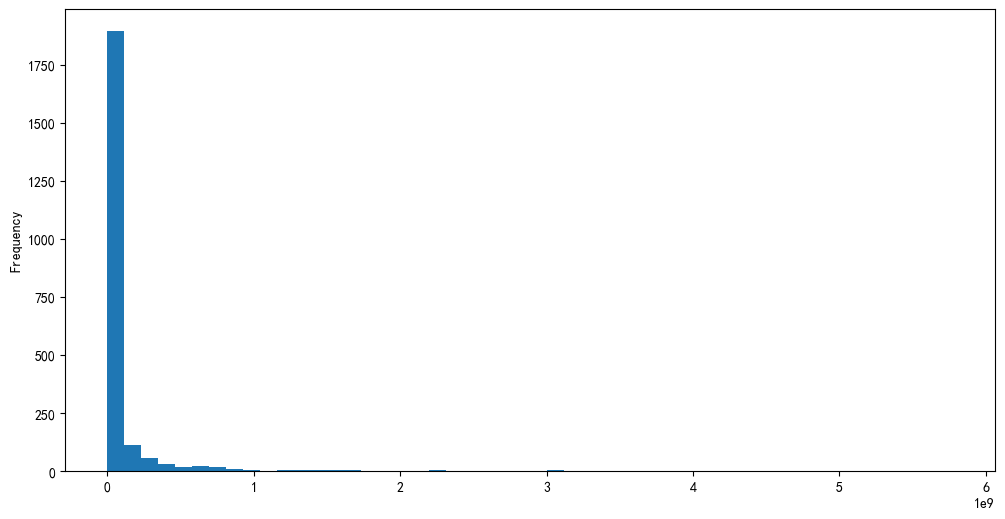

In [13]:
df['猫眼.票房'].plot(kind='hist', bins=50, figsize=(12, 6))

In [14]:
awards_collection = pd.read_excel('../metadata/电影奖项分级.xlsx', sheet_name=1)
awards_collection

,名称,档次
0,奥斯卡,1
1,柏林国际电影节,1
2,戛纳电影节,1
3,威尼斯电影节,1
4,中国电影金鸡奖,2
...,...,...
88,中国电视金鹰奖,8
89,上海电视节白玉兰奖,8
90,中国（广州）国际纪录片节,8
91,日剧学院赏,8


In [15]:
number_of_awards_class = len(awards_collection['档次'].unique())
f"共有奖项种类{number_of_awards_class}"

'共有奖项种类8'

In [16]:
df['猫眼.获奖情况'] = df['猫眼.获奖情况'].apply(lambda x: eval(x))

In [17]:
def get_awards_level(awards):
    if len(awards_collection) == 0:
        return []
    freq = []
    for award in awards:
        try:
            name = award['award_name'].split('届')[1]
            t = awards_collection[awards_collection['名称'] == name]['档次'].values[0]
            freq.append(t)
        except:
            freq.append(-1)
    
    return freq
        
        
df['猫眼.获奖情况.档次'] = df['猫眼.获奖情况'].apply(get_awards_level)

In [18]:
def get_awards_score(tiers):
    score = 0
    for tier in tiers:
        if tier != -1:
            score += 1/tier
        else:
            score += 1/number_of_awards_class
    return int(score * 10)

df['猫眼.获奖情况.档次性能得分'] = df['猫眼.获奖情况.档次'].apply(get_awards_score)

---
### 特征工程

In [19]:
df['豆瓣.基础信息.制片国家/地区.数量'] =  df['豆瓣.基础信息.制片国家/地区'].apply(lambda x: len(eval(x)))

In [20]:
df['豆瓣.基础信息.语言.数量'] =  df['豆瓣.基础信息.语言'].apply(lambda x: len(eval(x)))

In [21]:

def extract_year(date: list):
    if len(date) == 0:
        return -1
    else:
        return int(re.findall(r'\d{4}', date[0])[0])


# df['豆瓣.基础信息.上映日期'] = df['豆瓣.基础信息.上映日期'].apply(lambda x: eval(x)[0])
# # 提取年份
df['豆瓣.基础信息.上映年份'] = df['豆瓣.基础信息.上映日期'].apply(lambda x: extract_year(eval(x)))

<Axes: title={'center': '豆瓣电影上映年份分布'}>

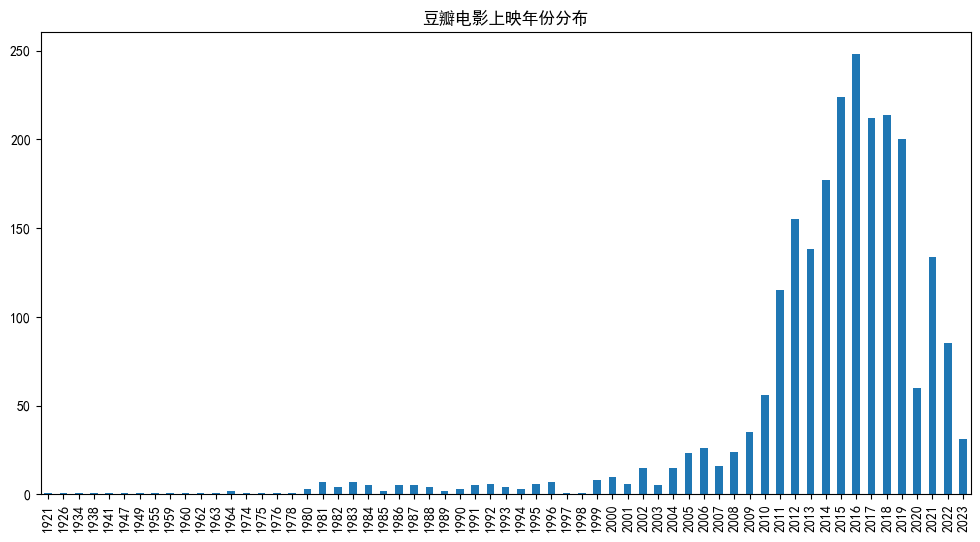

In [22]:
plt.title('豆瓣电影上映年份分布')
df['豆瓣.基础信息.上映年份'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))

In [23]:
df['豆瓣.基础信息.片长']

0                           ['95分钟']
1                           ['92分钟']
2                           ['92分钟']
3                      ['117分钟(台湾)']
4       ['126分钟(中国大陆)', '131分钟(法国)']
                    ...             
2325                        ['81分钟']
2326                        ['85分钟']
2327                       ['106分钟']
2328                        ['90分钟']
2329                        ['88分钟']
Name: 豆瓣.基础信息.片长, Length: 2330, dtype: object

In [24]:
def extract_runtime(time: list):
    # print(time)
    if len(time) == 0:
        return -1
    else:
        # print(time[0], re.findall(r'\d+', time[0]))
        return int(re.findall(r'\d+', time[0])[0])

# 豆瓣.基础信息.片长
# df['豆瓣.基础信息.片长'] = df['豆瓣.基础信息.片长'].apply(lambda x: eval(x)[0])
# 提取数字
df['豆瓣.基础信息.片长'] = df['豆瓣.基础信息.片长'].apply(lambda x: extract_runtime(eval(x)))

<Axes: title={'center': '豆瓣电影片长分布'}, ylabel='Frequency'>

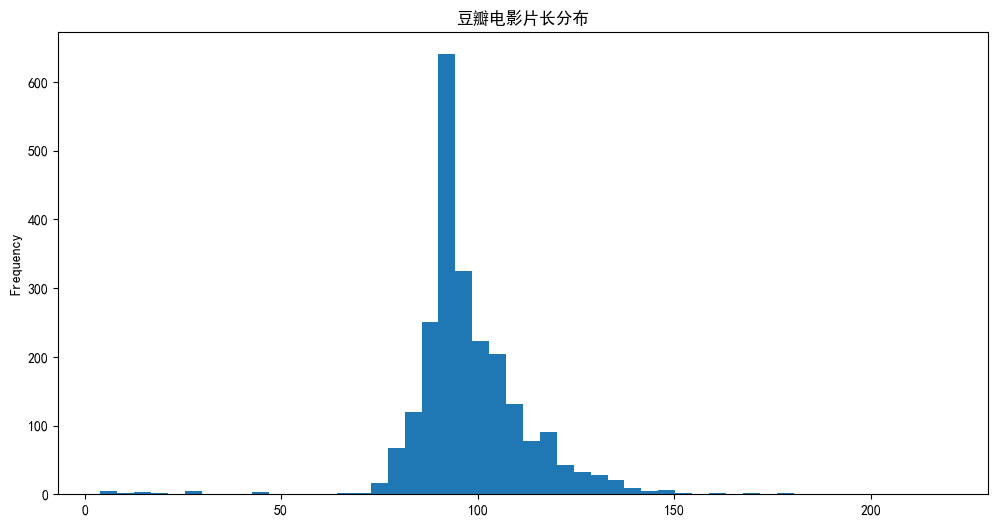

In [25]:
plt.title('豆瓣电影片长分布')
df['豆瓣.基础信息.片长'].plot(kind='hist', bins=50, figsize=(12, 6))

In [26]:
df['时光.打分数据.评分'] = df['时光.打分数据.评分'].apply(lambda x: eval(x))


In [27]:
# 打开为 音乐, 画面, 导演, 故事, 表演
expanded = pd.json_normalize(df['时光.打分数据.评分'])
expanded.columns = ['时光.打分数据.评分.音乐', '时光.打分数据.评分.画面', '时光.打分数据.评分.导演', '时光.打分数据.评分.故事', '时光.打分数据.评分.表演']


In [28]:
expanded = expanded.applymap(lambda x: float(x['rating']))
expanded.head()

,时光.打分数据.评分.音乐,时光.打分数据.评分.画面,时光.打分数据.评分.导演,时光.打分数据.评分.故事,时光.打分数据.评分.表演
0,7.5,7.3,6.6,6.7,7.1
1,0.0,0.0,0.0,0.0,0.0
2,7.0,7.4,6.5,6.5,6.9
3,7.3,7.7,7.2,7.5,7.6
4,7.8,7.7,8.0,7.5,7.7


In [29]:
# merge expanded to df on left
df = pd.concat([df, expanded], axis=1)

In [30]:
# 时光.拍摄技术
df['时光.拍摄技术.数量'] = df['时光.拍摄技术'].apply(lambda x: len(eval(x)))

<Axes: title={'center': '时光网电影拍摄技术数量分布'}>

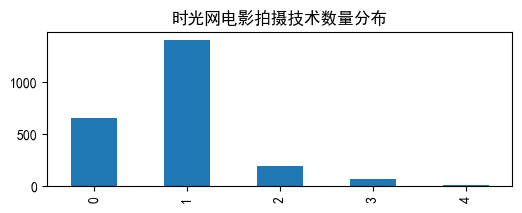

In [31]:
plt.title('时光网电影拍摄技术数量分布')
df['时光.拍摄技术.数量'].value_counts().sort_index().plot(kind='bar', figsize=(6, 2))

In [32]:
# 猫眼.获奖情况
df['猫眼.获奖情况.数量'] = df['猫眼.获奖情况'].apply(lambda x: len(x))

<Axes: title={'center': '猫眼电影获奖情况数量分布'}>

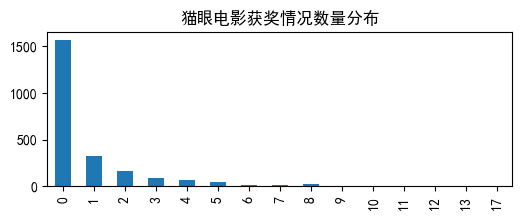

In [33]:
plt.title('猫眼电影获奖情况数量分布')
df['猫眼.获奖情况.数量'].value_counts().sort_index().plot(kind='bar', figsize=(6, 2))

In [34]:
# df.to_excel('./data_cleaned.xlsx', index=False)

In [35]:
# 对 猫眼.票房 求log
df['猫眼.票房.log'] = np.log(df['猫眼.票房'])

<Axes: title={'center': '猫眼电影票房log分布'}, ylabel='Frequency'>

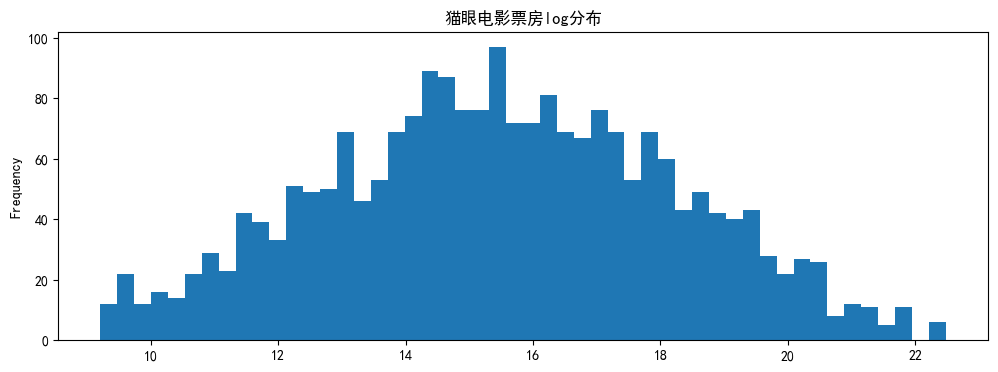

In [36]:
plt.title('猫眼电影票房log分布')
df['猫眼.票房.log'].plot(kind='hist', bins=50, figsize=(12, 4))

In [37]:
def extract_director(director: list):
    if len(director) == 0:
        return '未知'
    else:
        return director[0]
# 只保留第一个导演
df['豆瓣.基础信息.导演'] = df['豆瓣.基础信息.导演'].apply(lambda x: extract_director(eval(x)))

In [38]:
# 只保留5个主演

def extract_actors(actors: list):
    if len(actors) == 0:
        return []
    else:
        return actors[:5]

df['豆瓣.基础信息.主演'] = df['豆瓣.基础信息.主演'].apply(lambda x: extract_actors(eval(x)))
    

In [39]:
# 只保留1个编剧
    
def extract_writers(writers: list):
    if len(writers) == 0:
        return '未知'
    else:
        return writers[0]

df['豆瓣.基础信息.编剧'] = df['豆瓣.基础信息.编剧'].apply(lambda x: extract_writers(eval(x)))
    

In [40]:
df['豆瓣.基础信息.编剧'] = df['豆瓣.基础信息.编剧'].astype(str)
df['豆瓣.基础信息.编剧'].replace('[]', '未知', inplace=True)

---

### 处理celebrity数据

In [41]:
import json
with open("../celebrity_MaoYan.json", "r", encoding="utf-8") as f:
    data_maoyan = json.load(f)

In [42]:
data_maoyan = list(filter(lambda x: "exist" not in x, data_maoyan))

In [43]:
f"共存在合法演员信息 {len(data_maoyan)} 条"

'共存在合法演员信息 11080 条'

In [44]:
maoyan_df = pd.json_normalize(data_maoyan)
maoyan_df.columns = ['猫眼.导演.姓名', '猫眼.导演.uid','猫眼.导演.总票房', '猫眼.导演.获奖详情']
maoyan_df.head(5)

,猫眼.导演.姓名,猫眼.导演.uid,猫眼.导演.总票房,猫眼.导演.获奖详情
0,吴涵伊,1,3280000.0,[]
1,杨家麟,2,60000.0,[]
2,寿美菜子,3,188000000.0,[]
3,林莉,4,-1.0,[]
4,顾美华,5,244000000.0,[{'获奖基本信息': {'获奖封面': 'https://p1.meituan.net/m...


In [45]:
maoyan_df['猫眼.导演.获奖详情.个数'] = maoyan_df['猫眼.导演.获奖详情'].apply(lambda x: len(x)).astype(int)

In [46]:
maoyan_df['猫眼.导演.总票房.log'] = np.log(maoyan_df['猫眼.导演.总票房'])

c:\Users\CHENY\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [47]:
# merge maoyan_df and df
df = pd.merge(df, maoyan_df, left_on='豆瓣.基础信息.导演', right_on='猫眼.导演.姓名', how='left')
# df.fillna(0, inplace=True)

In [48]:
with open("../metadata/celebrity_AiMan.json", "r", encoding="utf-8") as f:
    data_aiman = json.load(f)

In [49]:
data_aiman = pd.json_normalize(data_aiman)
data_aiman.columns = ['艾曼.导演.商业价值', '艾曼.导演.代言指数', '艾曼.导演.热度指数', '艾曼.导演.口碑指数', '艾曼.导演.专业指数', '艾曼.导演.姓名', '艾曼.导演.uid']

In [50]:
data_aiman

,艾曼.导演.商业价值,艾曼.导演.代言指数,艾曼.导演.热度指数,艾曼.导演.口碑指数,艾曼.导演.专业指数,艾曼.导演.姓名,艾曼.导演.uid
0,19.9050,15.3850,4.5100,0.0000,28.1950,吴涵伊,1
1,27.7875,15.3850,0.0000,0.0000,38.3175,杨家麟,2
2,48.1975,15.3850,3.9900,1.7700,61.3975,寿美菜子,3
3,44.3725,29.8225,26.2100,2.8450,46.8000,林莉,4
4,0.0000,0.0000,0.0000,0.0000,0.0000,顾美华,5
...,...,...,...,...,...,...,...
17134,0.0000,0.0000,0.0000,0.0000,0.0000,瑞德·斯科特,17135
17135,35.4025,15.3850,24.2150,12.3475,40.8900,郎鹤炎,17136
17136,20.1075,15.3850,12.6900,1.3600,25.7475,小玉,17137
17137,63.4275,15.3850,24.5475,3.2450,76.5100,韦伟,17138


In [51]:
df = pd.merge(df, data_aiman, left_on='豆瓣.基础信息.导演', right_on='艾曼.导演.姓名', how='left')

---

In [52]:
def cal_actors_indexes(actors: list):
    agg_comm = []
    agg_endo = []
    agg_heat = []
    agg_word = []
    agg_prof = []
    if len(actors) == 0:
        return {
            '艾曼.演员.商业价值.最大': 0,
            '艾曼.演员.代言指数.最大': 0,
            '艾曼.演员.热度指数.最大': 0,
            '艾曼.演员.口碑指数.最大': 0,
            '艾曼.演员.专业指数.最大': 0,
            
            '艾曼.演员.商业价值.平均': 0,
            '艾曼.演员.代言指数.平均': 0,
            '艾曼.演员.热度指数.平均': 0,
            '艾曼.演员.口碑指数.平均': 0,
            '艾曼.演员.专业指数.平均': 0,
        }
    for actor in actors:
        if actor in data_aiman['艾曼.导演.姓名'].values:
            agg_comm.append(data_aiman[data_aiman['艾曼.导演.姓名'] == actor]['艾曼.导演.商业价值'].values[0])
            agg_endo.append(data_aiman[data_aiman['艾曼.导演.姓名'] == actor]['艾曼.导演.代言指数'].values[0])
            agg_heat.append(data_aiman[data_aiman['艾曼.导演.姓名'] == actor]['艾曼.导演.热度指数'].values[0])
            agg_word.append(data_aiman[data_aiman['艾曼.导演.姓名'] == actor]['艾曼.导演.口碑指数'].values[0])
            agg_prof.append(data_aiman[data_aiman['艾曼.导演.姓名'] == actor]['艾曼.导演.专业指数'].values[0])
        else:
            agg_comm.append(0)
            agg_endo.append(0)
            agg_heat.append(0)
            agg_word.append(0)
            agg_prof.append(0)

    return {
        '艾曼.演员.商业价值.最大': max(agg_comm),
        '艾曼.演员.代言指数.最大': max(agg_endo),
        '艾曼.演员.热度指数.最大': max(agg_heat),
        '艾曼.演员.口碑指数.最大': max(agg_word),
        '艾曼.演员.专业指数.最大': max(agg_prof),
        
        '艾曼.演员.商业价值.平均': np.mean(agg_comm),
        '艾曼.演员.代言指数.平均': np.mean(agg_endo),
        '艾曼.演员.热度指数.平均': np.mean(agg_heat),
        '艾曼.演员.口碑指数.平均': np.mean(agg_word),
        '艾曼.演员.专业指数.平均': np.mean(agg_prof),
    }

# attach actors indexes to df
df['艾曼.演员.指数'] = df['豆瓣.基础信息.主演'].apply(cal_actors_indexes)

In [53]:
aiman_expanded = pd.json_normalize(df['艾曼.演员.指数'])
df = pd.concat([df, aiman_expanded], axis=1)

In [54]:
maoyan_df

,猫眼.导演.姓名,猫眼.导演.uid,猫眼.导演.总票房,猫眼.导演.获奖详情,猫眼.导演.获奖详情.个数,猫眼.导演.总票房.log
0,吴涵伊,1,3.280000e+06,[],0,15.003354
1,杨家麟,2,6.000000e+04,[],0,11.002100
2,寿美菜子,3,1.880000e+08,[],0,19.051953
3,林莉,4,-1.000000e+00,[],0,NaN
4,顾美华,5,2.440000e+08,[{'获奖基本信息': {'获奖封面': 'https://p1.meituan.net/m...,3,19.312679
...,...,...,...,...,...,...
11075,冯铭潮,17133,4.908000e+07,[],0,17.708962
11076,瑞德·斯科特,17135,1.891000e+09,[{'获奖基本信息': {'获奖封面': 'https://p1.meituan.net/m...,1,21.360372
11077,郎鹤炎,17136,1.791000e+07,[],0,16.700870
11078,韦伟,17138,1.230000e+08,[],0,18.627695


In [55]:
# df = pd.merge(df, maoyan_df, left_on='豆瓣.基础信息.导演', right_on='猫眼.导演.姓名', how='left')
maoyan_df.columns = ['猫眼.编剧.姓名', '猫眼.编剧.uid','猫眼.编剧.总票房', '猫眼.编剧.获奖详情', '猫眼.编剧.获奖详情.个数', '猫眼.编剧.总票房.log']



In [56]:
df = pd.merge(df, maoyan_df, left_on='豆瓣.基础信息.编剧', right_on='猫眼.编剧.姓名', how='left')

In [57]:
with open('../data/star_baidu_data_feed_index.json', 'r', encoding='utf-8') as f1:
    star_baidu_data_feed_index = json.load(f1)

with open('../data/star_baidu_data_search_index.json', 'r', encoding='utf-8') as f2:
    star_baidu_data_search_index = json.load(f2)

In [58]:
# 根据电影的df['电影名称'] 从百度指数中获取对应的指数
def get_star_baidu_feed_index(name):
    _ = list(filter(lambda x: x['key'] == name, star_baidu_data_feed_index))
    if len(_) == 0:
        return []
    else:
        return _[0]['pairs']

def get_star_baidu_search_index(name):
    _ = list(filter(lambda x: x['key'] == name, star_baidu_data_search_index))
    if len(_) == 0:
        return []
    else:
        return _[0]['pairs']



In [59]:
df['猫眼.编剧.百度资讯指数'] = df['猫眼.编剧.姓名'].apply(get_star_baidu_feed_index)
df['猫眼.编剧.百度搜索指数'] = df['猫眼.编剧.姓名'].apply(get_star_baidu_search_index)

df['猫眼.导演.百度资讯指数'] = df['猫眼.导演.姓名'].apply(get_star_baidu_feed_index)
df['猫眼.导演.百度搜索指数'] = df['猫眼.导演.姓名'].apply(get_star_baidu_search_index)

In [60]:
def extract_nomination_counts(awards: list):
    res = 0
    if type(awards) is not list or len(awards) == 0:
        return 0
    else:
        for award in awards:
            
            nomination_item = award['获奖基本信息']['获奖次数']
            if '提名' in nomination_item:
                cnt = int(re.findall(r'\d+', nomination_item)[-1])
                res += cnt
            # return 
        return res
# test = [{'获奖基本信息': {'获奖封面': 'https://p0.meituan.net/movie/ecb8b3c759744d14724b3c7d7d8f34377214.jpg@128w_128h_1e_1c', '获奖名称': '长春电影节', '获奖次数': '提名1次'}, '获奖详情': [['第17届-最佳剪辑(提名)', '《奇迹·笨小孩》 2022']]}] 
df['猫眼.导演.获奖.提名.次数'] = df['猫眼.导演.获奖详情'].apply(extract_nomination_counts)
df['猫眼.编剧.获奖.提名.次数'] = df['猫眼.编剧.获奖详情'].apply(extract_nomination_counts)

In [61]:
df['豆瓣.基础信息.主演']

0                [周依然, 施柏宇, 祁圣翰, 魏允熙, 白妤霏]
1                            [董娉, 傅冲, 阮惟新]
2         [邓超, 珍·玛奇, 让-巴蒂斯特·莫尼耶, 刘宸希, 伊能静]
3       [陈坤, 徐若瑄 Vivian Hsu, 李冰冰, 归亚蕾, 秦汉]
4                  [赵涛, 张译, 梁景东, 董子健, 张艾嘉]
                       ...                
2325                  [丁妍, 叶方, 杨进, 孙科, 张洋]
2326              [于朦胧, 王李丹妮, 郭艳, 南笙, 倪大红]
2327             [邬立朋, 冯家慧, 王子部, 朱玮菱, 代汝茜]
2328             [把文翰, 钱小华, 庄崧冽, 吴永红, 钱海英]
2329           [李炳渊, 大卫·贝利, 李炳雷, 黄译萱, 王洪祥]
Name: 豆瓣.基础信息.主演, Length: 2330, dtype: object

In [62]:
maoyan_df

,猫眼.编剧.姓名,猫眼.编剧.uid,猫眼.编剧.总票房,猫眼.编剧.获奖详情,猫眼.编剧.获奖详情.个数,猫眼.编剧.总票房.log
0,吴涵伊,1,3.280000e+06,[],0,15.003354
1,杨家麟,2,6.000000e+04,[],0,11.002100
2,寿美菜子,3,1.880000e+08,[],0,19.051953
3,林莉,4,-1.000000e+00,[],0,NaN
4,顾美华,5,2.440000e+08,[{'获奖基本信息': {'获奖封面': 'https://p1.meituan.net/m...,3,19.312679
...,...,...,...,...,...,...
11075,冯铭潮,17133,4.908000e+07,[],0,17.708962
11076,瑞德·斯科特,17135,1.891000e+09,[{'获奖基本信息': {'获奖封面': 'https://p1.meituan.net/m...,1,21.360372
11077,郎鹤炎,17136,1.791000e+07,[],0,16.700870
11078,韦伟,17138,1.230000e+08,[],0,18.627695


In [63]:
def get_maen_boxoffice(actors: list):
    total, cnt = 0, 0
    if len(actors) == 0:
        return 0
    for actor in actors:
        if actor in maoyan_df['猫眼.编剧.姓名'].values:
            bo = maoyan_df[maoyan_df['猫眼.编剧.姓名'] == actor]['猫眼.编剧.总票房'].values[0]
            total += bo
            cnt += 1
    if cnt == 0:
        return 0
    return total / cnt

df['猫眼.主演.生涯票房.平均'] = df['豆瓣.基础信息.主演'].apply(get_maen_boxoffice)

In [64]:
def get_all_awards(actors: list):
    res = []
    for actor in actors:
        if actor in maoyan_df['猫眼.编剧.姓名'].values:
            awards = maoyan_df[maoyan_df['猫眼.编剧.姓名'] == actor]['猫眼.编剧.获奖详情'].values[0]
            res += awards
    return res
            
df['猫眼.主演.获奖.详情'] = df['豆瓣.基础信息.主演'].apply(get_all_awards)

In [65]:
df['猫眼.主演.提名.总次数'] = df['猫眼.主演.获奖.详情'].apply(extract_nomination_counts)
df['猫眼.主演.提名.平均'] = df['猫眼.主演.提名.总次数'] / df['豆瓣.基础信息.主演'].apply(lambda x: len(x))

In [66]:
def get_mean_baidu_feed_index(actors: list):
    if len(actors) == 0:
        return []
    feed_index_list = []
    for actor in actors:
        feed_index = list(map(lambda x: int(x[1]), get_star_baidu_feed_index(actor)))
        if len(feed_index) != 0:
            feed_index_list.append(feed_index)
            # print(feed_index)
    # print(feed_index_list)
    if len(feed_index_list) == 0:
        return []
        
    max_length = max(len(arr) for arr in feed_index_list)  # 获取最长数组长度
    
    # 填充数组使其具有相同的形状
    feed_index_list = [arr + [0] * (max_length - len(arr)) for arr in feed_index_list]
    
    mean_ = np.mean(feed_index_list, axis=0).tolist()
    # print(mean_)
    return mean_

def get_mean_baidu_search_index(actors: list):
    if len(actors) == 0:
        return []
    search_index_list = []
    for actor in actors:
        search_index = list(map(lambda x: int(x[1]), get_star_baidu_search_index(actor)))
        if len(search_index) != 0:
            search_index_list.append(search_index)
            # print(search_index)
    # print(search_index_list)
    if len(search_index_list) == 0:
        return []
        
    max_length = max(len(arr) for arr in search_index_list)  # 获取最长数组长度
    
    # 填充数组使其具有相同的形状
    search_index_list = [arr + [0] * (max_length - len(arr)) for arr in search_index_list]
    
    mean_ = np.mean(search_index_list, axis=0).tolist()
    # print(mean_)
    return mean_
        
# get_mean_baidu_feed_index(['张国荣', '张曼玉', '刘德华', '张学友', '梁朝伟'])
df['猫眼.演员.百度资讯指数.按日期均值'] = df['豆瓣.基础信息.主演'].apply(get_mean_baidu_feed_index)
df['猫眼.演员.百度搜索指数.按日期均值'] = df['豆瓣.基础信息.主演'].apply(get_mean_baidu_search_index)

In [67]:
# 求整体均值df['猫眼.演员.百度资讯指数.按日期均值']
df['猫眼.演员.百度资讯指数.整体均值'] = df['猫眼.演员.百度资讯指数.按日期均值'].apply(lambda x: np.mean(x))
df['猫眼.演员.百度搜索指数.整体均值'] = df['猫眼.演员.百度搜索指数.按日期均值'].apply(lambda x: np.mean(x))

c:\Users\CHENY\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\CHENY\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [68]:
def cal_mean_baidu_index(indexes: list):
    if len(indexes) == 0:
        return 0
    return np.mean(list(map(lambda x: int(x[1]), indexes)))

df['百度搜索指数.整体均值'] = df['百度搜索指数'].apply(cal_mean_baidu_index)
df['百度资讯指数.整体均值'] = df['百度资讯指数'].apply(cal_mean_baidu_index)

In [69]:
df['猫眼.导演.百度搜索指数.整体均值'] = df['猫眼.导演.百度搜索指数'].apply(cal_mean_baidu_index)
df['猫眼.导演.百度资讯指数.整体均值'] = df['猫眼.导演.百度资讯指数'].apply(cal_mean_baidu_index)

In [70]:
df.columns

Index(['电影名称', '获取时间', 'id.豆瓣', 'id.时光', 'id.猫眼', '豆瓣.基础信息.导演', '豆瓣.基础信息.编剧',
       '豆瓣.基础信息.主演', '豆瓣.基础信息.制片国家/地区', '豆瓣.基础信息.语言', '豆瓣.基础信息.上映日期',
       '豆瓣.基础信息.片长', '豆瓣.基础信息.封面', '豆瓣.打分数据.评分', '豆瓣.打分数据.评分人数', '豆瓣.感兴趣指数.看过',
       '豆瓣.感兴趣指数.想看', '时光.打分数据.电影名', '时光.打分数据.评分', '时光.打分数据.总评分',
       '时光.打分数据.评分人数', '时光.打分数据.想看人数', '时光.拍摄技术', '猫眼.票房', '猫眼.获奖情况',
       '豆瓣.基础信息.类型', '百度资讯指数', '百度搜索指数', '猫眼.获奖情况.档次', '猫眼.获奖情况.档次性能得分',
       '豆瓣.基础信息.制片国家/地区.数量', '豆瓣.基础信息.语言.数量', '豆瓣.基础信息.上映年份', '时光.打分数据.评分.音乐',
       '时光.打分数据.评分.画面', '时光.打分数据.评分.导演', '时光.打分数据.评分.故事', '时光.打分数据.评分.表演',
       '时光.拍摄技术.数量', '猫眼.获奖情况.数量', '猫眼.票房.log', '猫眼.导演.姓名', '猫眼.导演.uid',
       '猫眼.导演.总票房', '猫眼.导演.获奖详情', '猫眼.导演.获奖详情.个数', '猫眼.导演.总票房.log',
       '艾曼.导演.商业价值', '艾曼.导演.代言指数', '艾曼.导演.热度指数', '艾曼.导演.口碑指数', '艾曼.导演.专业指数',
       '艾曼.导演.姓名', '艾曼.导演.uid', '艾曼.演员.指数', '艾曼.演员.商业价值.最大', '艾曼.演员.代言指数.最大',
       '艾曼.演员.热度指数.最大', '艾曼.演员.口碑指数.最大', '艾曼.演员.专业指数.最大', '艾曼.演员.商业价值.平均',
       '艾曼.演员.代言指数.平均', '艾曼.演员.热度指数.平均

In [71]:
df.to_excel('./data_merged.xlsx', index=False)

In [72]:
# df.to_excel('S:/完整指标.xlsx', index=False)

In [73]:
df = pd.read_excel('./data_merged.xlsx')

In [74]:
df.columns

Index(['电影名称', '获取时间', 'id.豆瓣', 'id.时光', 'id.猫眼', '豆瓣.基础信息.导演', '豆瓣.基础信息.编剧',
       '豆瓣.基础信息.主演', '豆瓣.基础信息.制片国家/地区', '豆瓣.基础信息.语言', '豆瓣.基础信息.上映日期',
       '豆瓣.基础信息.片长', '豆瓣.基础信息.封面', '豆瓣.打分数据.评分', '豆瓣.打分数据.评分人数', '豆瓣.感兴趣指数.看过',
       '豆瓣.感兴趣指数.想看', '时光.打分数据.电影名', '时光.打分数据.评分', '时光.打分数据.总评分',
       '时光.打分数据.评分人数', '时光.打分数据.想看人数', '时光.拍摄技术', '猫眼.票房', '猫眼.获奖情况',
       '豆瓣.基础信息.类型', '百度资讯指数', '百度搜索指数', '猫眼.获奖情况.档次', '猫眼.获奖情况.档次性能得分',
       '豆瓣.基础信息.制片国家/地区.数量', '豆瓣.基础信息.语言.数量', '豆瓣.基础信息.上映年份', '时光.打分数据.评分.音乐',
       '时光.打分数据.评分.画面', '时光.打分数据.评分.导演', '时光.打分数据.评分.故事', '时光.打分数据.评分.表演',
       '时光.拍摄技术.数量', '猫眼.获奖情况.数量', '猫眼.票房.log', '猫眼.导演.姓名', '猫眼.导演.uid',
       '猫眼.导演.总票房', '猫眼.导演.获奖详情', '猫眼.导演.获奖详情.个数', '猫眼.导演.总票房.log',
       '艾曼.导演.商业价值', '艾曼.导演.代言指数', '艾曼.导演.热度指数', '艾曼.导演.口碑指数', '艾曼.导演.专业指数',
       '艾曼.导演.姓名', '艾曼.导演.uid', '艾曼.演员.指数', '艾曼.演员.商业价值.最大', '艾曼.演员.代言指数.最大',
       '艾曼.演员.热度指数.最大', '艾曼.演员.口碑指数.最大', '艾曼.演员.专业指数.最大', '艾曼.演员.商业价值.平均',
       '艾曼.演员.代言指数.平均', '艾曼.演员.热度指数.平均

In [75]:
# # 根据celebrit_df中的数据，对df中的导演tier进行标记
# def tier_mapping(celebrities: list):
#     tier_list = []
#     for item in celebrities:
#         if celebrity_df[celebrity_df['姓名_x'] == item].empty:
#             tier_list.append(-1)
#         else:
#             tier_list.append(celebrity_df[celebrity_df['姓名_x'] == item]['tier'].values[0])
        
#     return tier_list

# # tier_mapping(['张杰', '邓超'])

# df['豆瓣.基础信息.导演.等级'] = df['豆瓣.基础信息.导演'].apply(lambda x: tier_mapping([x]))

In [76]:
# df['豆瓣.基础信息.导演.等级'] = df['豆瓣.基础信息.导演.等级'].apply(lambda x: x[0])
# df['豆瓣.基础信息.导演.等级'].plot(kind='hist', bins=50, figsize=(12, 6))

In [77]:
# df['豆瓣.基础信息.主演.等级'] = df['豆瓣.基础信息.主演'].apply(lambda x: tier_mapping(x[:10]))

In [78]:
# def freq_count(x):
#     # count the frequency of each tier
#     freq = {}
#     for item in x:
#         if item == -1:
#             continue
#         if item in freq:
#             freq[item] += 1
#         else:
#             freq[item] = 1
#     return freq

# df['豆瓣.基础信息.主演.等级'].apply(lambda x: freq_count(x))

---

---

In [79]:
df.columns

Index(['电影名称', '获取时间', 'id.豆瓣', 'id.时光', 'id.猫眼', '豆瓣.基础信息.导演', '豆瓣.基础信息.编剧',
       '豆瓣.基础信息.主演', '豆瓣.基础信息.制片国家/地区', '豆瓣.基础信息.语言', '豆瓣.基础信息.上映日期',
       '豆瓣.基础信息.片长', '豆瓣.基础信息.封面', '豆瓣.打分数据.评分', '豆瓣.打分数据.评分人数', '豆瓣.感兴趣指数.看过',
       '豆瓣.感兴趣指数.想看', '时光.打分数据.电影名', '时光.打分数据.评分', '时光.打分数据.总评分',
       '时光.打分数据.评分人数', '时光.打分数据.想看人数', '时光.拍摄技术', '猫眼.票房', '猫眼.获奖情况',
       '豆瓣.基础信息.类型', '百度资讯指数', '百度搜索指数', '猫眼.获奖情况.档次', '猫眼.获奖情况.档次性能得分',
       '豆瓣.基础信息.制片国家/地区.数量', '豆瓣.基础信息.语言.数量', '豆瓣.基础信息.上映年份', '时光.打分数据.评分.音乐',
       '时光.打分数据.评分.画面', '时光.打分数据.评分.导演', '时光.打分数据.评分.故事', '时光.打分数据.评分.表演',
       '时光.拍摄技术.数量', '猫眼.获奖情况.数量', '猫眼.票房.log', '猫眼.导演.姓名', '猫眼.导演.uid',
       '猫眼.导演.总票房', '猫眼.导演.获奖详情', '猫眼.导演.获奖详情.个数', '猫眼.导演.总票房.log',
       '艾曼.导演.商业价值', '艾曼.导演.代言指数', '艾曼.导演.热度指数', '艾曼.导演.口碑指数', '艾曼.导演.专业指数',
       '艾曼.导演.姓名', '艾曼.导演.uid', '艾曼.演员.指数', '艾曼.演员.商业价值.最大', '艾曼.演员.代言指数.最大',
       '艾曼.演员.热度指数.最大', '艾曼.演员.口碑指数.最大', '艾曼.演员.专业指数.最大', '艾曼.演员.商业价值.平均',
       '艾曼.演员.代言指数.平均', '艾曼.演员.热度指数.平均

In [80]:
numerical_features = ['豆瓣.基础信息.片长','豆瓣.打分数据.评分', '豆瓣.打分数据.评分人数',
       '豆瓣.感兴趣指数.看过', '豆瓣.感兴趣指数.想看','时光.打分数据.总评分', '时光.打分数据.评分人数', '时光.打分数据.想看人数',
       '豆瓣.基础信息.制片国家/地区.数量', '豆瓣.基础信息.语言.数量',
       '豆瓣.基础信息.上映年份', '时光.打分数据.评分.音乐', '时光.打分数据.评分.画面', '时光.打分数据.评分.导演',
       '时光.打分数据.评分.故事', '时光.打分数据.评分.表演', '时光.拍摄技术.数量', '猫眼.获奖情况.数量',
       '猫眼.导演.总票房.log', '猫眼.导演.获奖详情.个数','猫眼.获奖情况.档次性能得分',
       '艾曼.导演.商业价值', '艾曼.导演.代言指数', '艾曼.导演.热度指数', '艾曼.导演.口碑指数', '艾曼.导演.专业指数',
       
       '百度搜索指数.整体均值', '百度资讯指数.整体均值','猫眼.导演.百度搜索指数.整体均值', '猫眼.导演.百度资讯指数.整体均值',
       # '猫眼.获奖情况.档次性能得分',
       '艾曼.演员.商业价值.最大', '艾曼.演员.代言指数.最大','艾曼.演员.热度指数.最大', '艾曼.演员.口碑指数.最大', '艾曼.演员.专业指数.最大', 
       '艾曼.演员.商业价值.平均','艾曼.演员.代言指数.平均', '艾曼.演员.热度指数.平均', '艾曼.演员.口碑指数.平均', '艾曼.演员.专业指数.平均',
       '猫眼.主演.提名.平均','猫眼.主演.生涯票房.平均',
       '猫眼.演员.百度搜索指数.整体均值', '猫眼.演员.百度资讯指数.整体均值', 
       '猫眼.票房.log'
       ]

In [81]:
# 对numerical_features进行[0,10]标准化
df[numerical_features] = df[numerical_features].apply(lambda x: (x - x.min()) / (x.max() - x.min()) * 10)

In [82]:
# categorical_features = ['豆瓣.基础信息.导演']

In [83]:
# # 对categorical_features进行数值化
# from sklearn.preprocessing import LabelEncoder
# for col in categorical_features:
#     df[col] = LabelEncoder().fit_transform(df[col])

<Axes: >

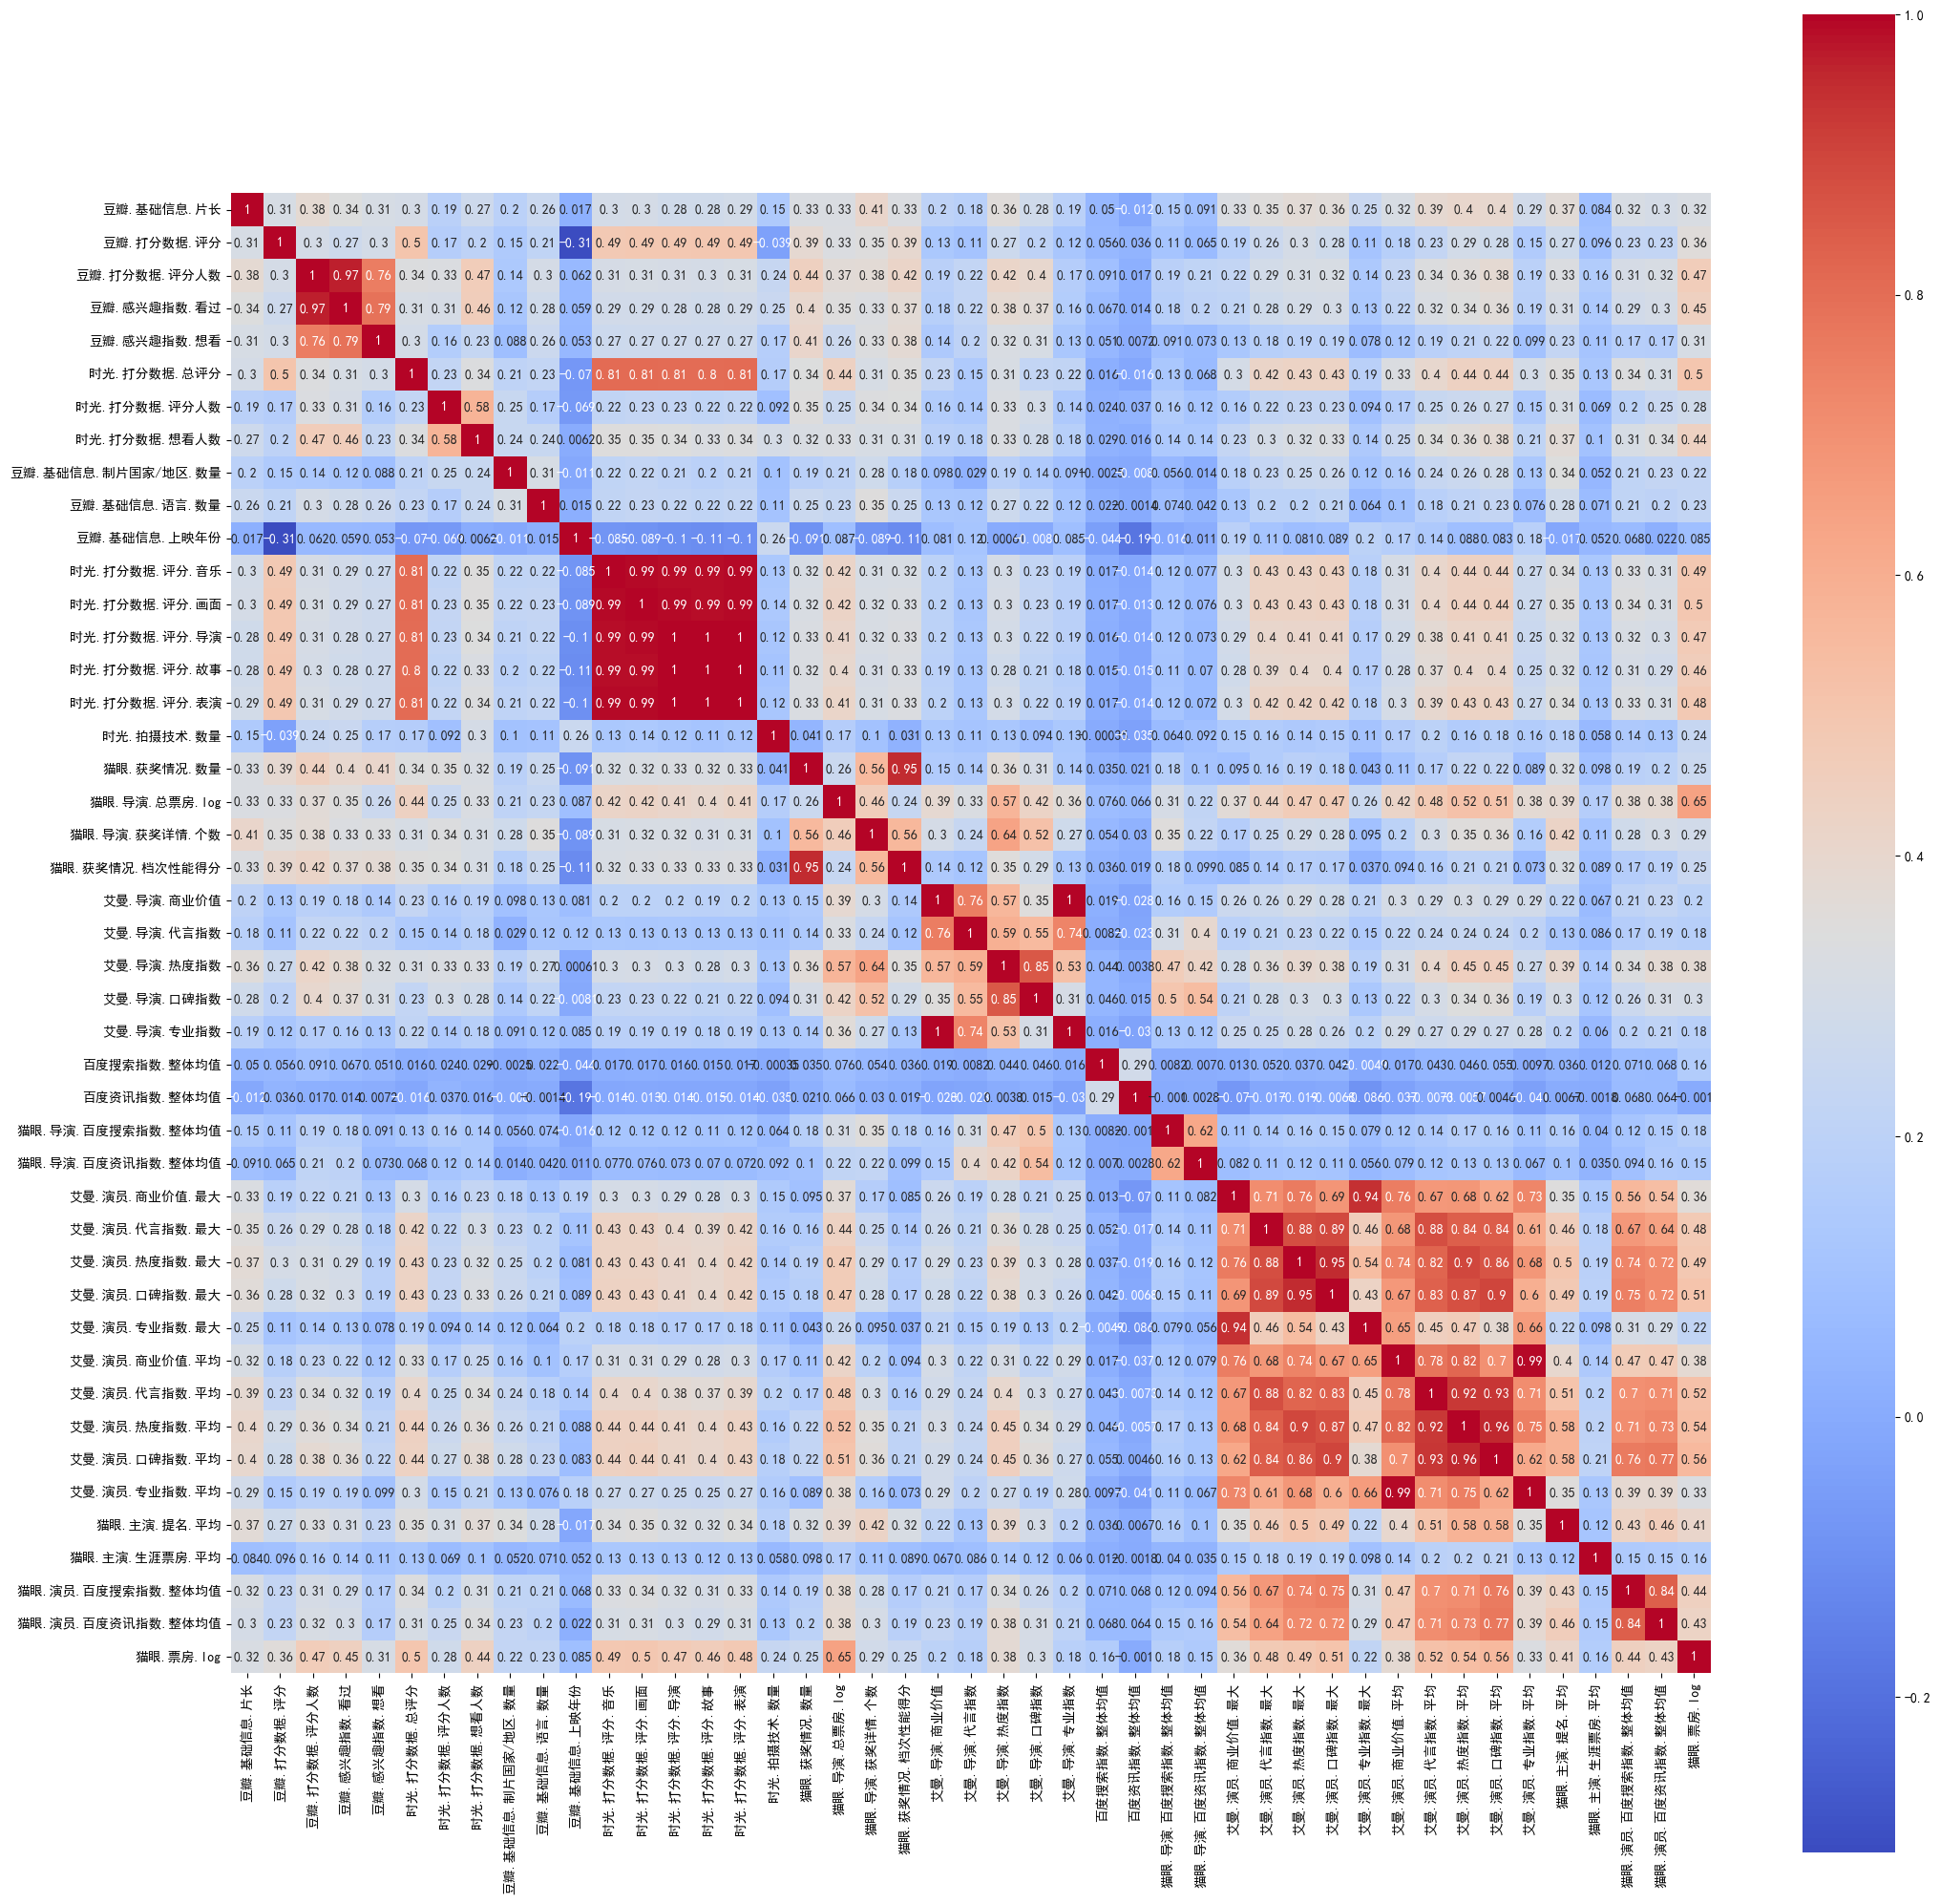

In [84]:
# corr map
# font chinese
plt.rcParams['font.sans-serif'] = ['SimHei']
corr = df[numerical_features].corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm')


---

In [85]:
# numerical_features.remove('猫眼.票房.log')

In [86]:
# numerical_features_used = ['豆瓣.打分数据.评分', '豆瓣.打分数据.评分人数',
#        '豆瓣.感兴趣指数.看过', '豆瓣.感兴趣指数.想看','时光.打分数据.总评分', '时光.打分数据.评分人数', '时光.打分数据.想看人数',
#        '时光.打分数据.评分.音乐', '时光.打分数据.评分.画面', '时光.打分数据.评分.导演',
#        '时光.打分数据.评分.故事', '时光.打分数据.评分.表演', '猫眼.获奖情况.数量',
#        '艾曼.导演.商业价值', '艾曼.导演.代言指数', '艾曼.导演.热度指数', '艾曼.导演.口碑指数', '艾曼.导演.专业指数',
#        '猫眼.导演.总票房.log', '猫眼.导演.获奖详情.个数',
#        # '猫眼.获奖情况.档次性能得分',
#        ]

In [87]:
numerical_features_used =['豆瓣.基础信息.片长','豆瓣.打分数据.评分', '豆瓣.打分数据.评分人数',
       '豆瓣.感兴趣指数.看过', '豆瓣.感兴趣指数.想看','时光.打分数据.总评分', '时光.打分数据.评分人数', '时光.打分数据.想看人数',
       '豆瓣.基础信息.制片国家/地区.数量', '豆瓣.基础信息.语言.数量',
       '豆瓣.基础信息.上映年份', '时光.打分数据.评分.音乐', '时光.打分数据.评分.画面', '时光.打分数据.评分.导演',
       '时光.打分数据.评分.故事', '时光.打分数据.评分.表演', '时光.拍摄技术.数量', '猫眼.获奖情况.数量',
       '猫眼.导演.总票房.log', '猫眼.导演.获奖详情.个数','猫眼.获奖情况.档次性能得分',
       '艾曼.导演.商业价值', '艾曼.导演.代言指数', '艾曼.导演.热度指数', '艾曼.导演.口碑指数', '艾曼.导演.专业指数',
       
       '百度搜索指数.整体均值', '百度资讯指数.整体均值','猫眼.导演.百度搜索指数.整体均值', '猫眼.导演.百度资讯指数.整体均值',
       # '猫眼.获奖情况.档次性能得分',
       '艾曼.演员.商业价值.最大', '艾曼.演员.代言指数.最大','艾曼.演员.热度指数.最大', '艾曼.演员.口碑指数.最大', '艾曼.演员.专业指数.最大', 
       '艾曼.演员.商业价值.平均','艾曼.演员.代言指数.平均', '艾曼.演员.热度指数.平均', '艾曼.演员.口碑指数.平均', '艾曼.演员.专业指数.平均',
       '猫眼.主演.提名.平均','猫眼.主演.生涯票房.平均',
       '猫眼.演员.百度搜索指数.整体均值', '猫眼.演员.百度资讯指数.整体均值', 
       ]

In [88]:
df.dropna(how='any', inplace=True)

In [89]:
# numerical_features.remove('猫眼.票房.log')
X = df[numerical_features_used]
y = df['猫眼.票房.log']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=24)

In [91]:
X_train.shape

(928, 44)

### Elastic Net

c:\Users\CHENY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235.92874739371882, tolerance: 0.358054763665356
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\CHENY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508.81515411879303, tolerance: 0.358054763665356
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\CHENY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 578.5650884310951, tolerance: 0.358054763665356
  model = cd_fast.enet_coordinate_descent_gram(
c:

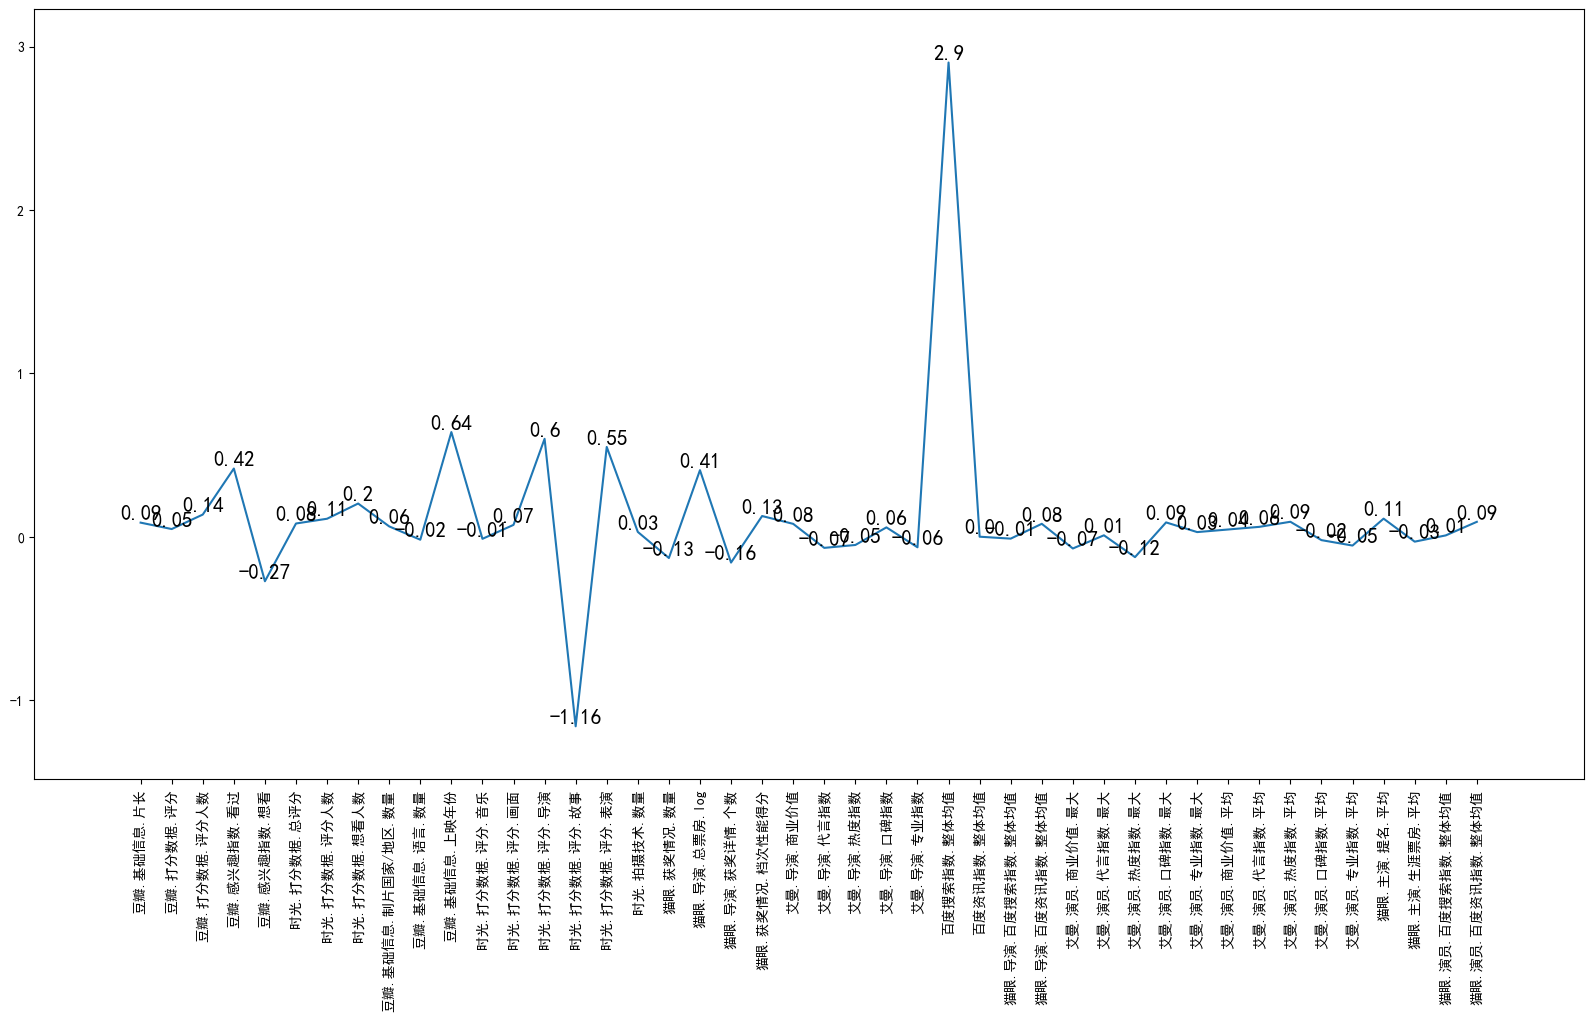

In [92]:
from sklearn.linear_model import ElasticNetCV
# 正确显示负号
plt.rcParams['axes.unicode_minus'] = False
alpha = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001] # 正则化强度参数
l1_ratio = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # L1正则化系数
model = ElasticNetCV(alphas=alpha, l1_ratio=l1_ratio, cv=20).fit(X_train, y_train)

# 回归系数
coef = model.coef_
# 截距
intercept = model.intercept_
# 最优正则化强度
alpha = model.alpha_
# 最优L1正则化系数
l1_ratio = model.l1_ratio_
# R^2
r2 = model.score(X_valid, y_valid)

# 画出回归曲线
plt.figure(figsize=(20, 10))
# 高质量图片
plt.rcParams['savefig.dpi'] = 600
plt.plot(range(len(X.columns)), coef)
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
# mark every coef on the line add margin
for i in range(len(X.columns)):
    plt.text(i, coef[i], round(coef[i], 2), ha='center', va='bottom', fontsize=15)
plt.margins(0.08)
plt.show()

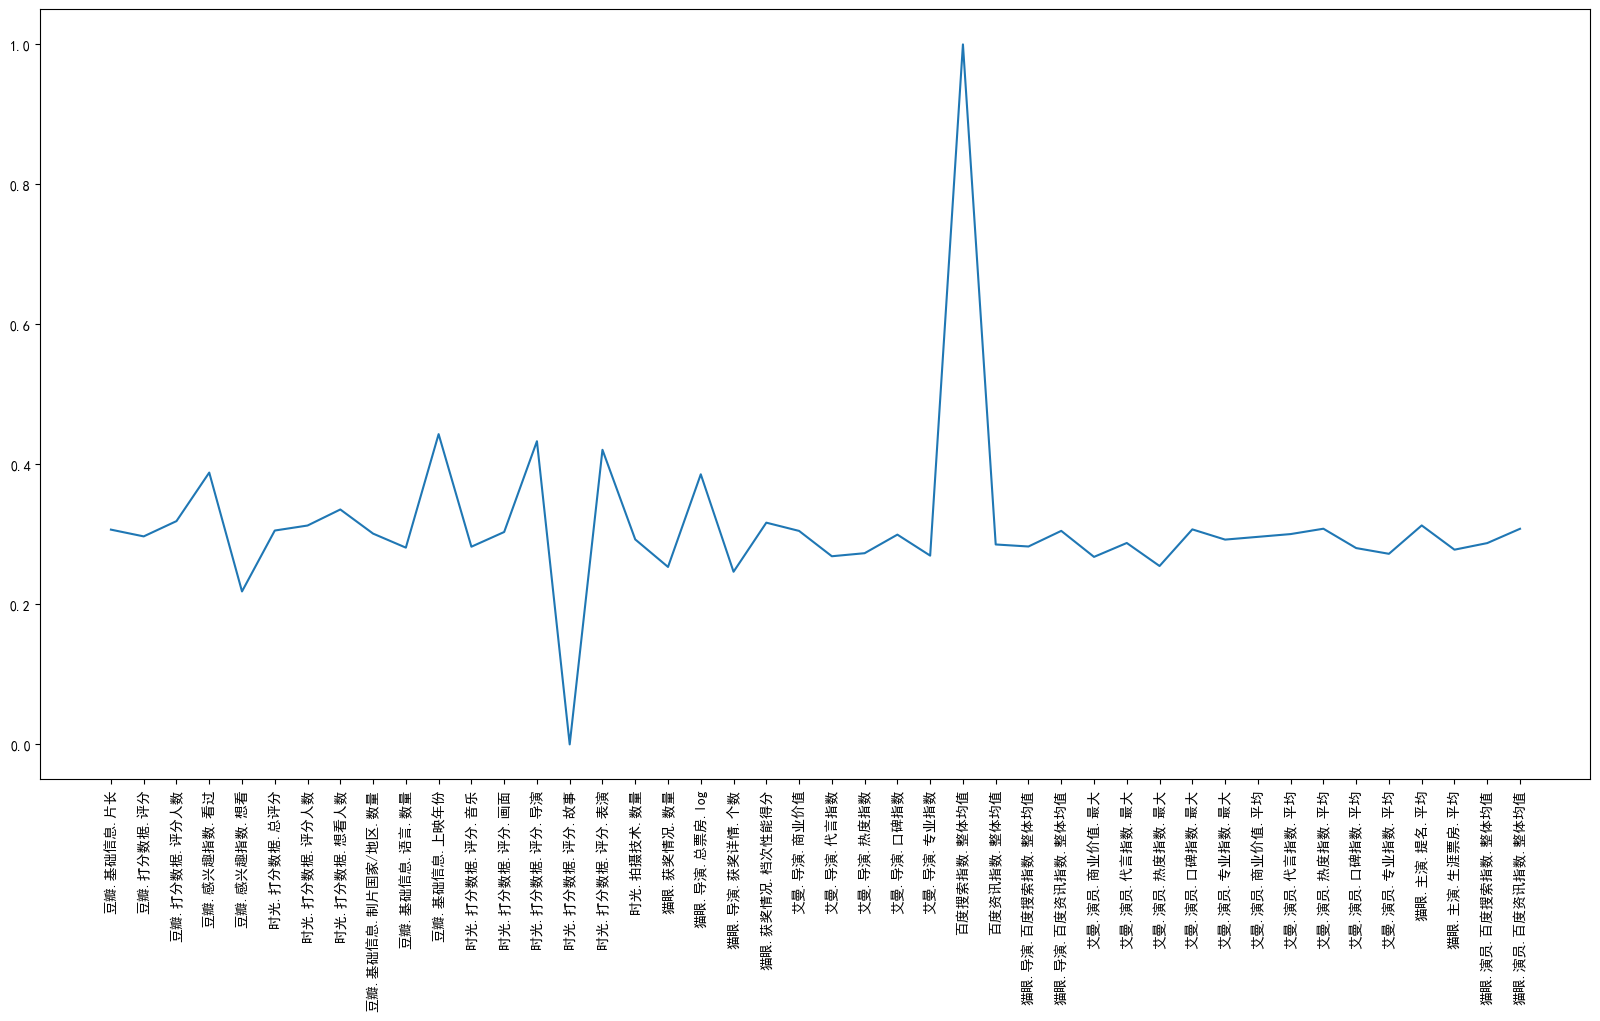

In [93]:
# 将coef标准化到[0,1]
coef = (coef - coef.min()) / (coef.max() - coef.min())
# 画出回归曲线
plt.figure(figsize=(20, 10))
# 高质量图片
plt.rcParams['savefig.dpi'] = 600
plt.plot(range(len(X.columns)), coef)
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
# mark every coef on the line add margin
# for i in range(len(X.columns)):
#     plt.text(i, coef[i], round(coef[i], 2), ha='center', va='bottom', fontsize=15)
# plt.margins(0.08)
plt.show()


In [94]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

alpha = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001] # 正则化强度参数
l1_ratio = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # L1正则化系数
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
elasticnet_model_cv = ElasticNet()
elasticnet_model_cv = GridSearchCV(estimator=elasticnet_model_cv, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
elasticnet_model_cv.fit(X_train, y_train)
print("最佳参数：", elasticnet_model_cv.best_params_)
print("最佳得分：", elasticnet_model_cv.best_score_)

# 用最佳参数构建一个模型
elasticnet_model = ElasticNet(
    alpha=elasticnet_model_cv.best_params_['alpha'], 
    l1_ratio=elasticnet_model_cv.best_params_['l1_ratio']
    )
elasticnet_model.fit(X_train, y_train)
print("训练集得分：", elasticnet_model.score(X_train, y_train))
print("测试集得分：", elasticnet_model.score(X_valid, y_valid))
# print("训练集r2_score得分：", r2_score(y_train, elasticnet_model.predict(X_train)))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
最佳参数： {'alpha': 0.001, 'l1_ratio': 0.9}
最佳得分： 0.6226245213222521
训练集得分： 0.6610471656180275
测试集得分： 0.7318430088223693


c:\Users\CHENY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+02, tolerance: 3.744e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\CHENY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+02, tolerance: 3.744e-01
  model = cd_fast.enet_coordinate_descent(


In [111]:
import pickle 
with open('enet.pickle','wb') as f: 
    pickle.dump(elasticnet_model,f) #将训练好的模型clf存储在变量f中，且保存到本地

In [95]:
print("训练集数据量：", len(X_train))
print("测试集数据量：", len(X_valid))

训练集数据量： 928
测试集数据量： 104


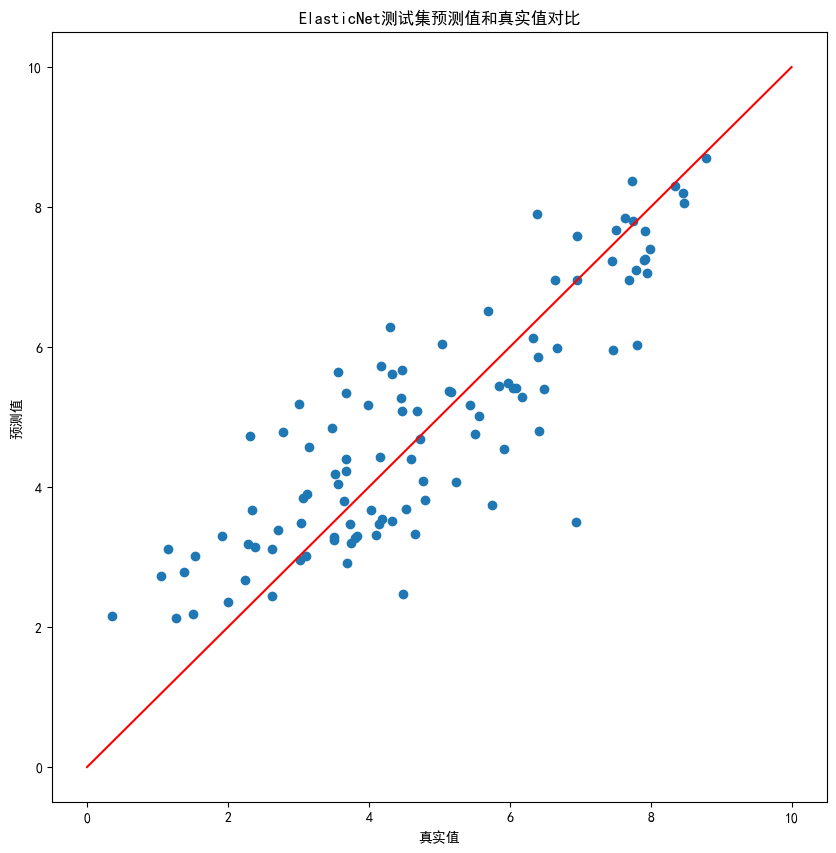

In [96]:
# 可视化预测值和真实值
y_pred = elasticnet_model.predict(X_valid)
# set dpi
plt.rcParams['savefig.dpi'] = 800
# print(y_pred)
plt.figure(figsize=(10, 10))
plt.title("ElasticNet测试集预测值和真实值对比")
plt.scatter(y_valid, y_pred)
plt.plot([0, 10], [0, 10], 'r-')
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.show()

### LightGBM

In [97]:
import lightgbm as lgb
# supress warnings
import warnings
warnings.filterwarnings("ignore")
params = {
    'boosting_type': 'gbdt', 
    'objective': 'regression', 

    'learning_rate': 0.0001, 
    'num_leaves': 50, 
    'max_depth': 6,

    'subsample': 0.8, 
    'colsample_bytree': 0.8, 
}

data_train = lgb.Dataset(X_train, y_train, silent=True)
cv_results = lgb.cv(
    params, data_train, num_boost_round=1000, nfold=5, stratified=False, shuffle=True, metrics='rmse',
    early_stopping_rounds=50, verbose_eval=50, show_stdv=True, seed=0)

print('best n_estimators:', len(cv_results['rmse-mean']))
print('best cv score:', cv_results['rmse-mean'][-1])


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6989
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 44
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6989
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 44
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6989
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 44
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000926 seconds.
You can set `force_col_

In [98]:
from sklearn.model_selection import GridSearchCV
### 我们可以创建lgb的sklearn模型，使用上面选择的(学习率，评估器数目)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=50,
                              learning_rate=0.00001, n_estimators=1000, max_depth=6,
                              metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8)

params_test1={
    'max_depth': range(3,8,2),
    'num_leaves':range(20, 170, 30)
}
gsearch1 = GridSearchCV(estimator=model_lgb, param_grid=params_test1, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


({'max_depth': 7, 'num_leaves': 50}, -3.985387444274391)

In [99]:
params_test2={
    'max_depth': [6,7,8],
    'num_leaves':range(40, 60)
}

gsearch2 = GridSearchCV(estimator=model_lgb, param_grid=params_test2, scoring='neg_mean_squared_error', cv=4, verbose=1, n_jobs=4)
gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_

Fitting 4 folds for each of 60 candidates, totalling 240 fits


({'max_depth': 8, 'num_leaves': 40}, -3.989281263406389)

In [100]:
params = {'num_leaves': gsearch2.best_params_['num_leaves'],
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': gsearch2.best_params_['max_depth'],
         'learning_rate': 0.002,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

lgbm = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
lgbm.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

# 模型评估
score_df = lgbm.score(X_train, y_train)
score_test = lgbm.score(X_valid, y_valid)

print("训练集得分：", score_df)
print("测试集得分：", score_test)

[1000]	training's rmse: 0.77698	valid_1's rmse: 0.958993
[2000]	training's rmse: 0.546604	valid_1's rmse: 0.924416
[3000]	training's rmse: 0.442969	valid_1's rmse: 0.91999
训练集得分： 0.9520739991803446
测试集得分： 0.7943176875790082


<Axes: ylabel='feature'>

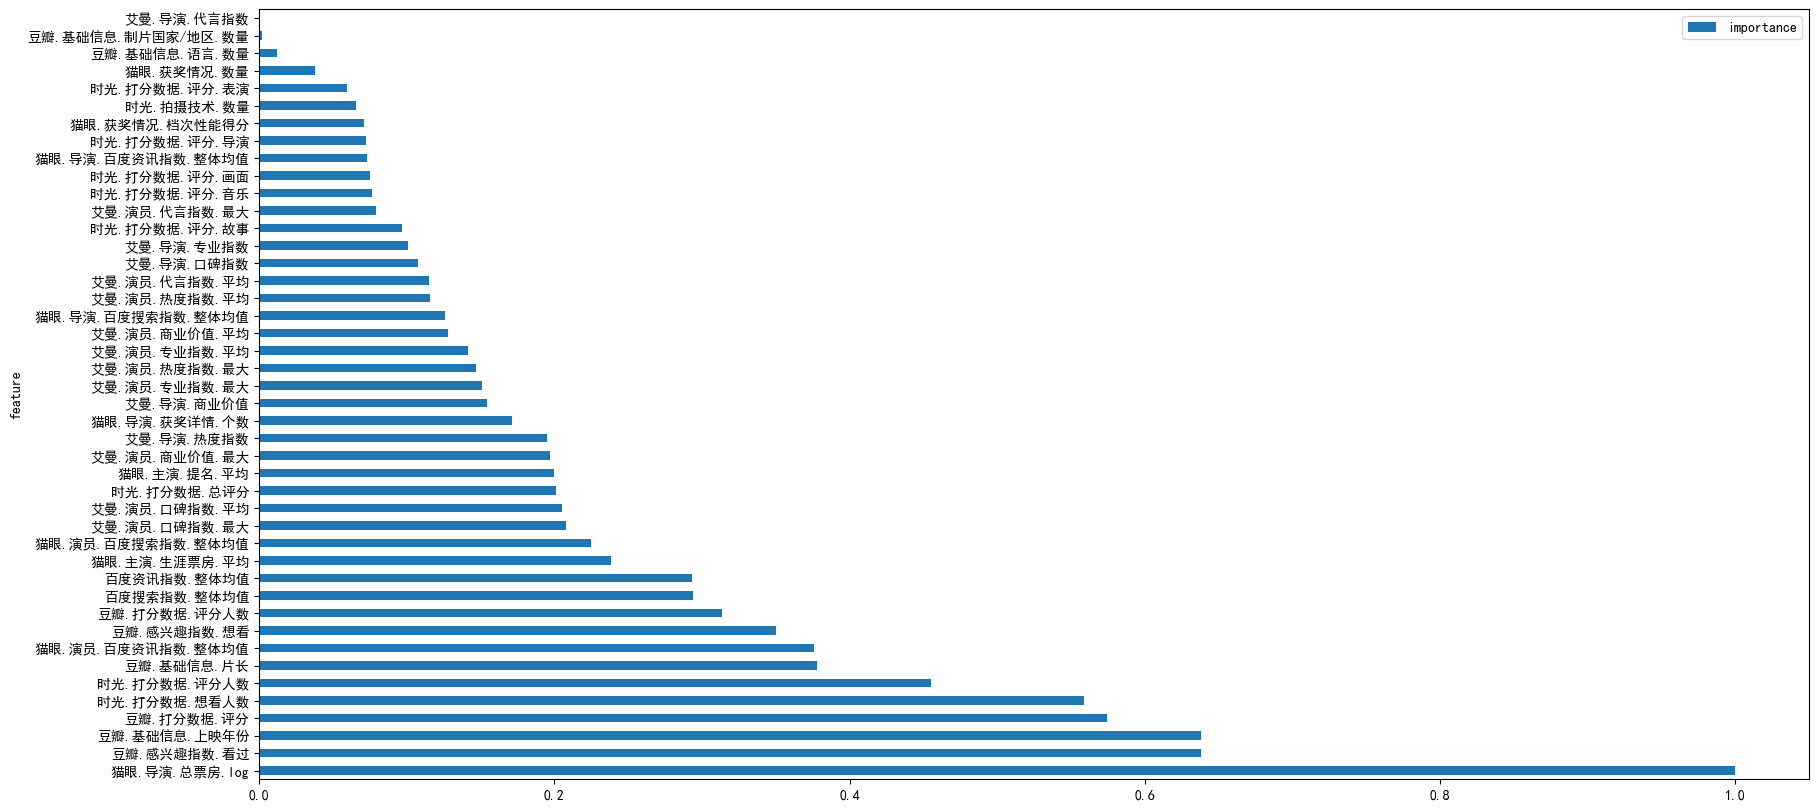

In [101]:
# 输出特征重要性
importance = lgbm.feature_importances_
# standardize the importance to 0-1
importance = importance / importance.max()

feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importance})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances.set_index('feature', inplace=True)
feature_importances.plot(kind='barh', figsize=(20, 10))


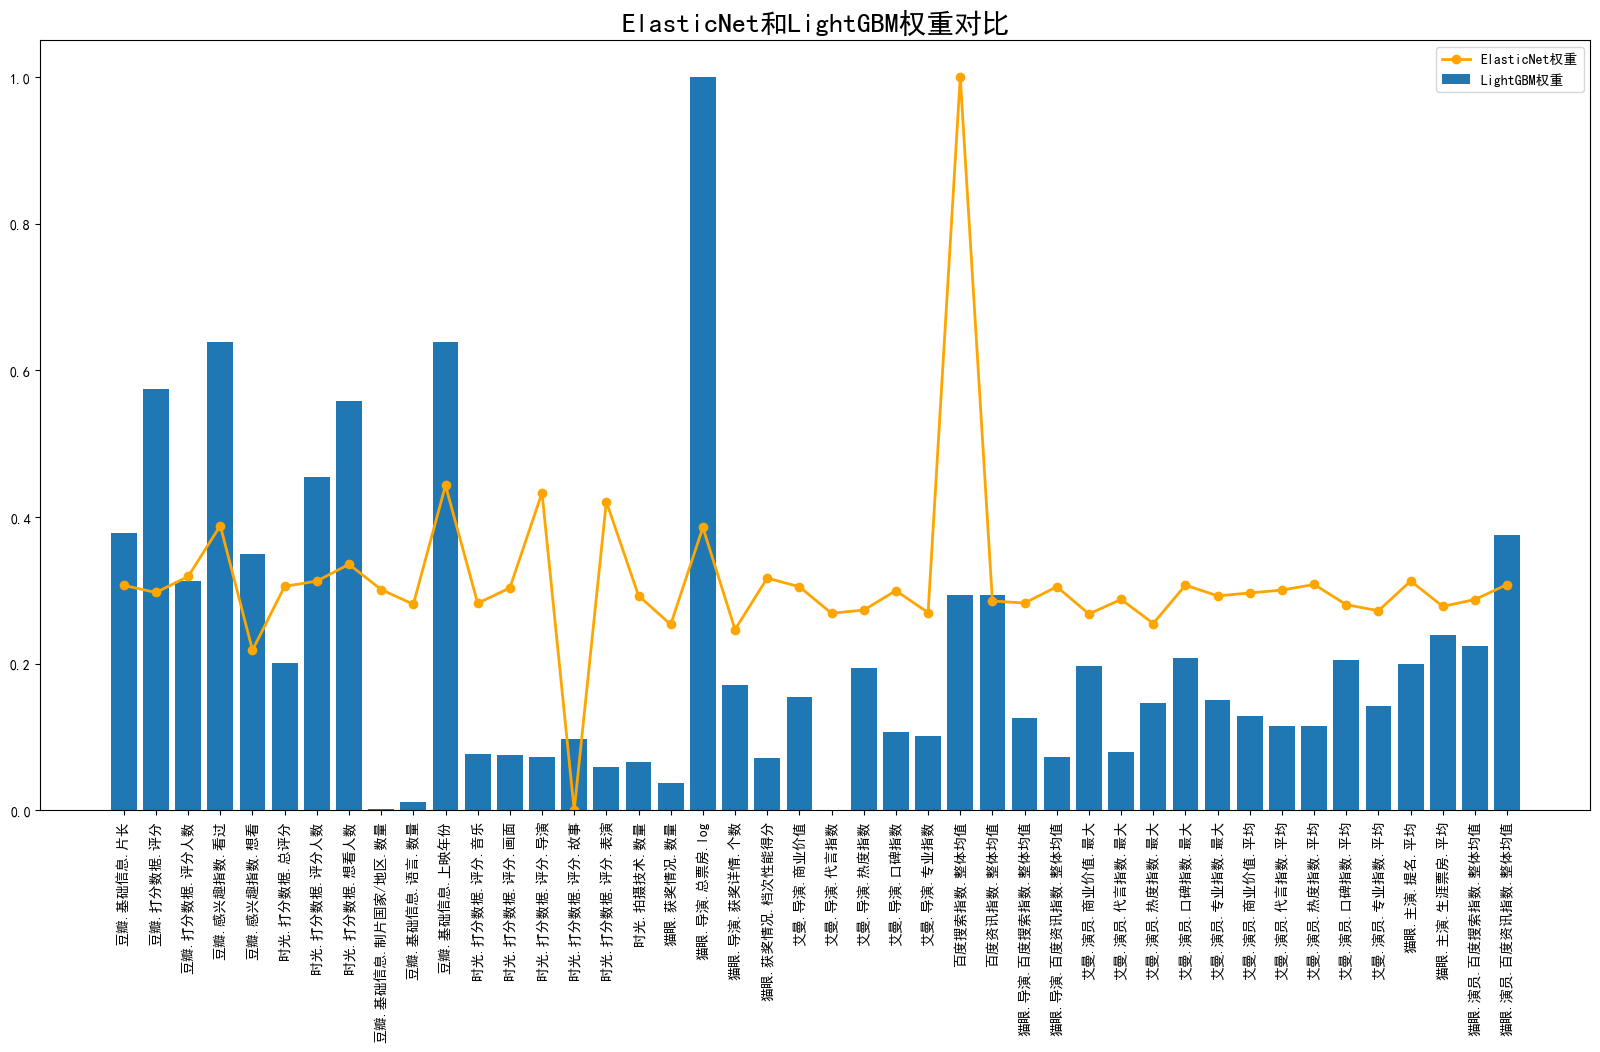

In [102]:
# coef, importance
# draw plot
plt.figure(figsize=(20, 10))
plt.title("ElasticNet和LightGBM权重对比", fontsize=20)
plt.bar([x for x in range(len(importance))], importance)
plt.plot([x for x in range(len(coef))], coef, 'o-', color='orange', linewidth=2)
plt.xticks([x for x in range(len(importance))], X_train.columns)
plt.xticks(rotation=90)
plt.legend(['ElasticNet权重', 'LightGBM权重'])
plt.show()



In [103]:
# 导出各个权重数据
importance_df = pd.DataFrame({'指标名称': X_train.columns, 'LightGBM权重': importance, 'ElasticNet权重': coef})
importance_df.to_excel('./各个指标权重.xlsx', index=False)

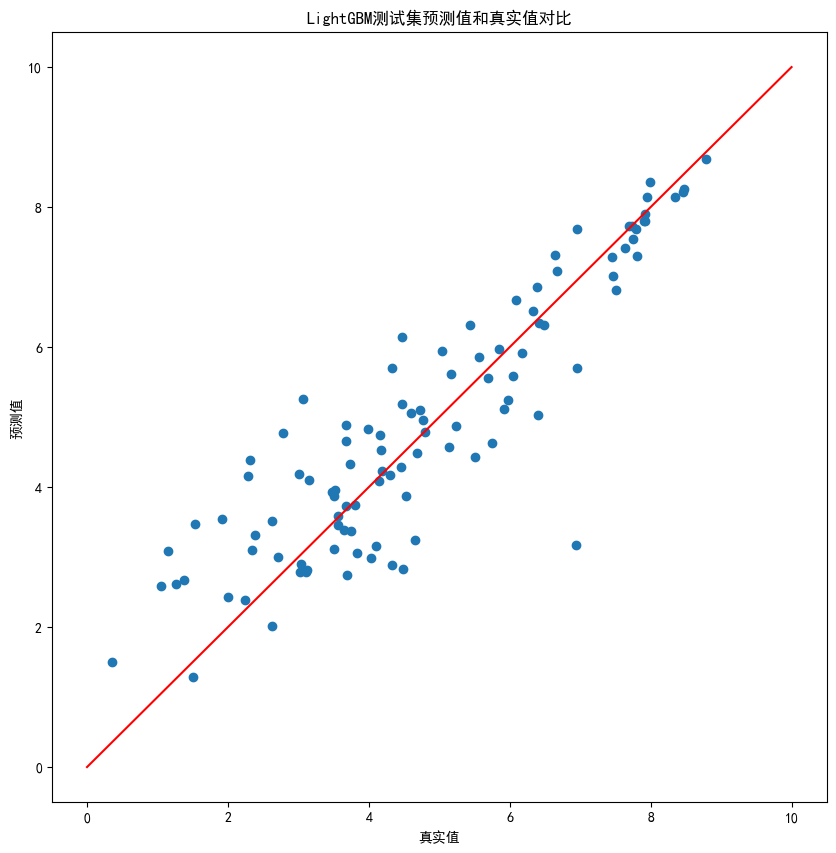

In [104]:
# 可视化预测值和真实值
y_pred = lgbm.predict(X_valid)

# print(y_pred)
plt.figure(figsize=(10, 10))
plt.title("LightGBM测试集预测值和真实值对比")
plt.scatter(y_valid, y_pred)
plt.plot([0, 10], [0, 10], 'r-')
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.show()

In [110]:
import pickle 
with open('lgbm.pickle','wb') as f: 
    pickle.dump(lgbm,f) #将训练好的模型clf存储在变量f中，且保存到本地

In [105]:
# 将 X_valid, y_valid 根据y_valid进行排序
y_valid = y_valid.sort_values(ascending=True)
X_valid = X_valid.reindex(y_valid.index)



In [106]:
y_pred_elasticnet, y_pred_lgbm = elasticnet_model.predict(X_valid), lgbm.predict(X_valid)

# 画图，x轴是数据的索引
# y_valid画柱状，y_pred_elasticnet画散点, y_pred_lgbm画散点


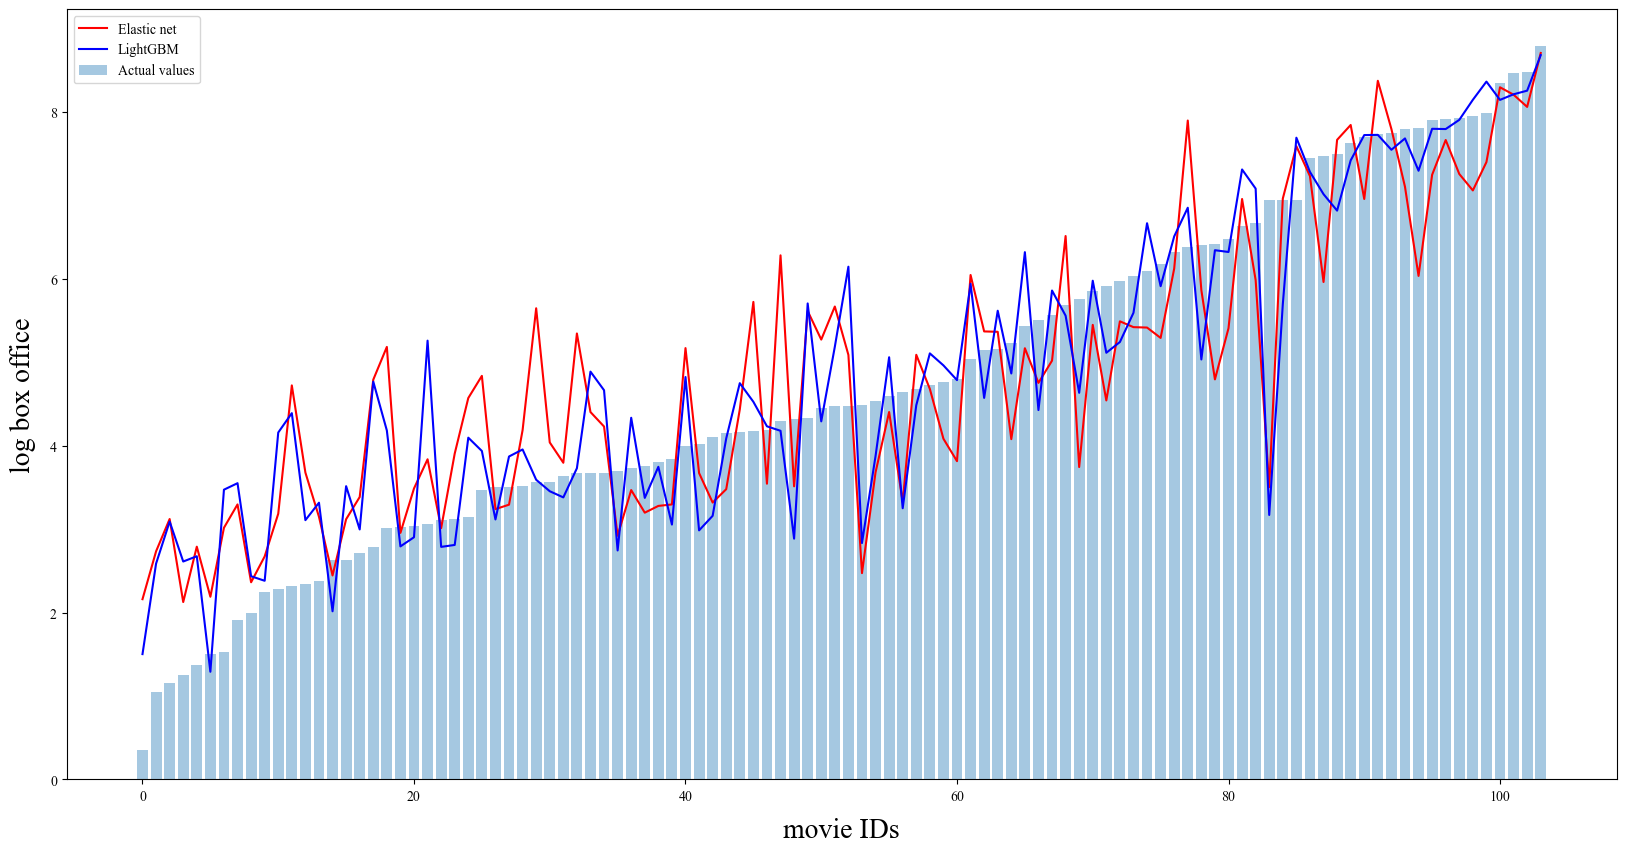

In [107]:

# set font new time roman
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.figure(figsize=(20, 10))
# plt.title("ElasticNet和LightGBM测试集预测值和真实值对比", fontsize=20)
# bar
plt.bar(range(len(y_valid)), y_valid, label='Actual values', alpha=0.4)
plt.plot(range(len(y_valid)), y_pred_elasticnet, 'r-', label='Elastic net')
plt.plot(range(len(y_valid)), y_pred_lgbm, 'b-', label='LightGBM')
# x label, margin 10
plt.xlabel("movie IDs", fontsize=20, labelpad=10)
plt.ylabel("log box office", fontsize=20, labelpad=10)
plt.legend()

In [108]:
# save y_valid, y_pred_elasticnet, y_pred_lgbm to excel
pd.DataFrame({'y_valid': y_valid, 'y_pred_elasticnet': y_pred_elasticnet, 'y_pred_lgbm': y_pred_lgbm}).to_excel('./y_valid_y_pred.xlsx', index=False)

---

### 模型加载

In [115]:
with open('lgbm.pickle','rb') as f:  
    lgbm = pickle.load(f)  #将模型存储在变量clf_load中  

FileNotFoundError: [Errno 2] No such file or directory: 'lgbm.pickle'

In [114]:
lgbm.feature_name_

['豆瓣.基础信息.片长',
 '豆瓣.打分数据.评分',
 '豆瓣.打分数据.评分人数',
 '豆瓣.感兴趣指数.看过',
 '豆瓣.感兴趣指数.想看',
 '时光.打分数据.总评分',
 '时光.打分数据.评分人数',
 '时光.打分数据.想看人数',
 '豆瓣.基础信息.制片国家/地区.数量',
 '豆瓣.基础信息.语言.数量',
 '豆瓣.基础信息.上映年份',
 '时光.打分数据.评分.音乐',
 '时光.打分数据.评分.画面',
 '时光.打分数据.评分.导演',
 '时光.打分数据.评分.故事',
 '时光.打分数据.评分.表演',
 '时光.拍摄技术.数量',
 '猫眼.获奖情况.数量',
 '猫眼.导演.总票房.log',
 '猫眼.导演.获奖详情.个数',
 '猫眼.获奖情况.档次性能得分',
 '艾曼.导演.商业价值',
 '艾曼.导演.代言指数',
 '艾曼.导演.热度指数',
 '艾曼.导演.口碑指数',
 '艾曼.导演.专业指数',
 '百度搜索指数.整体均值',
 '百度资讯指数.整体均值',
 '猫眼.导演.百度搜索指数.整体均值',
 '猫眼.导演.百度资讯指数.整体均值',
 '艾曼.演员.商业价值.最大',
 '艾曼.演员.代言指数.最大',
 '艾曼.演员.热度指数.最大',
 '艾曼.演员.口碑指数.最大',
 '艾曼.演员.专业指数.最大',
 '艾曼.演员.商业价值.平均',
 '艾曼.演员.代言指数.平均',
 '艾曼.演员.热度指数.平均',
 '艾曼.演员.口碑指数.平均',
 '艾曼.演员.专业指数.平均',
 '猫眼.主演.提名.平均',
 '猫眼.主演.生涯票房.平均',
 '猫眼.演员.百度搜索指数.整体均值',
 '猫眼.演员.百度资讯指数.整体均值']

--- 

### 可视化

In [109]:
stop

NameError: name 'stop' is not defined

In [ ]:
df = pd.read_excel('./data_merged.xlsx')

In [ ]:
df.dropna(how='any', inplace=True)
df.shape

(1032, 85)

In [ ]:
df.columns

Index(['电影名称', '获取时间', 'id.豆瓣', 'id.时光', 'id.猫眼', '豆瓣.基础信息.导演', '豆瓣.基础信息.编剧',
       '豆瓣.基础信息.主演', '豆瓣.基础信息.制片国家/地区', '豆瓣.基础信息.语言', '豆瓣.基础信息.上映日期',
       '豆瓣.基础信息.片长', '豆瓣.基础信息.封面', '豆瓣.打分数据.评分', '豆瓣.打分数据.评分人数', '豆瓣.感兴趣指数.看过',
       '豆瓣.感兴趣指数.想看', '时光.打分数据.电影名', '时光.打分数据.评分', '时光.打分数据.总评分',
       '时光.打分数据.评分人数', '时光.打分数据.想看人数', '时光.拍摄技术', '猫眼.票房', '猫眼.获奖情况',
       '豆瓣.基础信息.类型', '百度资讯指数', '百度搜索指数', '猫眼.获奖情况.档次', '猫眼.获奖情况.档次性能得分',
       '豆瓣.基础信息.制片国家/地区.数量', '豆瓣.基础信息.语言.数量', '豆瓣.基础信息.上映年份', '时光.打分数据.评分.音乐',
       '时光.打分数据.评分.画面', '时光.打分数据.评分.导演', '时光.打分数据.评分.故事', '时光.打分数据.评分.表演',
       '时光.拍摄技术.数量', '猫眼.获奖情况.数量', '猫眼.票房.log', '猫眼.导演.姓名', '猫眼.导演.uid',
       '猫眼.导演.总票房', '猫眼.导演.获奖详情', '猫眼.导演.获奖详情.个数', '猫眼.导演.总票房.log',
       '艾曼.导演.商业价值', '艾曼.导演.代言指数', '艾曼.导演.热度指数', '艾曼.导演.口碑指数', '艾曼.导演.专业指数',
       '艾曼.导演.姓名', '艾曼.导演.uid', '艾曼.演员.指数', '艾曼.演员.商业价值.最大', '艾曼.演员.代言指数.最大',
       '艾曼.演员.热度指数.最大', '艾曼.演员.口碑指数.最大', '艾曼.演员.专业指数.最大', '艾曼.演员.商业价值.平均',
       '艾曼.演员.代言指数.平均', '艾曼.演员.热度指数.平均

In [ ]:
# font new roman
plt.rcParams['font.sans-serif'] = ['Times New Roman']

<Axes: xlabel='log box office from Maoyan', ylabel='Frequency'>

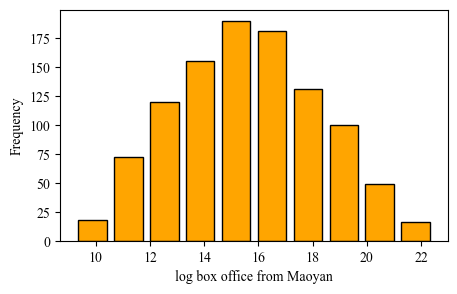

In [ ]:
# 直方图
plt.xlabel("log box office from Maoyan")
df['猫眼.票房.log'].plot(kind='hist', bins=10, figsize=(5, 3), edgecolor="black",rwidth=0.8, color='orange')

<Axes: xlabel='Director popularity index from Aiman', ylabel='Frequency'>

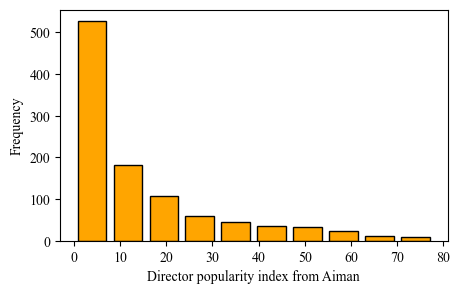

In [ ]:
# 艾曼.导演.热度指数 in en
plt.xlabel("Director popularity index from Aiman")
df['艾曼.导演.热度指数'].plot(kind='hist', bins=10, figsize=(5, 3), edgecolor="black",rwidth=0.8, color='orange')

<Axes: xlabel='Douban rating', ylabel='Frequency'>

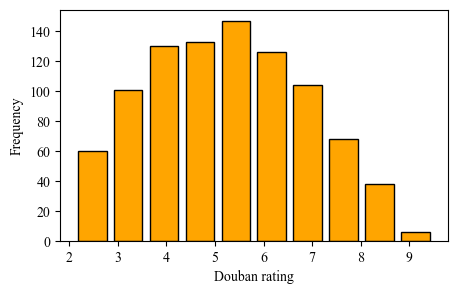

In [ ]:
# 豆瓣.打分数据.评分
plt.xlabel("Douban rating")
# 豆瓣.打分数据.评分 != -1
df[df['豆瓣.打分数据.评分'] != -1]['豆瓣.打分数据.评分'].plot(kind='hist', bins=10, figsize=(5, 3), edgecolor="black",rwidth=0.8, color='orange')
# df['豆瓣.打分数据.评分'].plot(kind='hist', bins=10, figsize=(5, 3), edgecolor="black",rwidth=0.8, color='orange')

<Axes: xlabel='Mean actor popularity index from Aiman', ylabel='Frequency'>

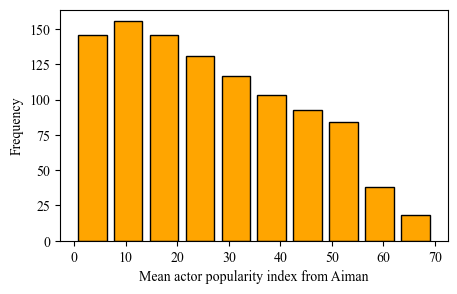

In [ ]:
# 艾曼.演员.热度指数.平均 
plt.xlabel("Mean actor popularity index from Aiman")
df['艾曼.演员.热度指数.平均'].plot(kind='hist', bins=10, figsize=(5, 3), edgecolor="black",rwidth=0.8, color='orange')